In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import missingno as msno

In [3]:
df = pd.read_excel(path, skiprows=1)

In [4]:
df.shape

(256, 28)

In [5]:
df = df.rename(columns={'вес ': 'Weight_on_buy'})
df = df.rename(columns={'вес .1': 'Weight_on_3.01.17'})
df = df.rename(columns={'Unnamed: 6': 'Weight_report_plus5'})
df = df.rename(columns={'вес .2': 'Weight_on_4.01.18'})
df = df.rename(columns={'Привес': 'Weight_in_plus'})
df = df.rename(columns={'Привес.1': 'Weight_in_plus1'})
df = df.rename(columns={'вес на 31.12.18': 'Weight_on_31.12.18'})
df = df.rename(columns={'вес 3 лакт': 'Weight_on_3_lact'})
df = df.rename(columns={'вес 2 лакт': 'Weight_on_2_lact_31.12.16'})
df = df.rename(columns={'вес 2 лакт.1': 'Weight_on_2_lact_31.12.17'})
df = df.rename(columns={'вес 3 лакт и выше': 'Weight_on_3_lact_heigher_31.12.18'})
df = df.rename(columns={'вес 2 лакт.2': 'Weight_on_2_lact2_31.12.18'})
df = df.rename(columns={'вес 1 лакт': 'Weight_on_lact1_31.12.17'})
df = df.rename(columns={'вес 1 лакт.1': 'Weight_on_lact1_31.12.18'})
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Дата рождения': 'Date_of_birth'})
df = df.rename(columns={'Unnamed: 13': 'Lactation'})

In [7]:
df = df.drop('ID', axis=1)
df.head(10)

,№,Date_of_birth,Weight_on_buy,Weight_on_3.01.17,Weight_in_plus,Weight_report_plus5,Weight_on_4.01.18,Weight_in_plus1,Weight_on_31.12.18,Unnamed: 10,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Weight_on_3_lact_heigher_31.12.18,Unnamed: 22,Weight_on_2_lact2_31.12.18,Weight_on_lact1_31.12.18,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,п\п,NaN,при покупке,на 3.01.17,NaN,NaN,на 4.01.18,NaN,NaN,NaN,...,NaN,NaN,NaN,2018-12-31 00:00:00,NaN,2018-12-31 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN
1,1,2015-01-30 00:00:00,50,59,9,NaN,65.35,NaN,61,NaN,...,NaN,NaN,1.0,61,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-31 00:00:00,52,55,3,NaN,65.3,NaN,65.1,NaN,...,NaN,NaN,2.0,65.1,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015-02-03 00:00:00,55,56,1,NaN,57,NaN,60.2,NaN,...,NaN,NaN,3.0,60.2,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015-02-03 00:00:00,44,44.2,0.2,NaN,52.3,умерла,52,NaN,...,NaN,NaN,4.0,52,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2015-02-04 00:00:00,48,50,2,NaN,59.8,NaN,99.5,NaN,...,NaN,NaN,5.0,99.5,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2015-02-05 00:00:00,54,47.5,-6.5,NaN,66.4,NaN,88,NaN,...,NaN,NaN,6.0,88,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2015-02-06 00:00:00,53,48.8,-4.2,NaN,58.1,NaN,67,NaN,...,NaN,NaN,7.0,67,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2015-01-08 00:00:00,60,68.5,8.5,NaN,72.7,NaN,86,NaN,...,NaN,NaN,8.0,86,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2015-03-02 00:00:00,48,56.35,8.35,NaN,56.7,NaN,48.6,NaN,...,NaN,NaN,9.0,48.6,NaN,NaN,NaN,NaN,NaN,NaN


In [411]:
df = df.drop(0)
df = df.drop(31)
df = df.drop('№', axis=1)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 1 to 255
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 221 non-null    object 
 1   Date_of_birth                      217 non-null    object 
 2   Weight_on_buy                      172 non-null    object 
 3   Weight_on_3.01.17                  141 non-null    object 
 4   Weight_in_plus                     127 non-null    object 
 5   Weight_report_plus5                137 non-null    object 
 6   Weight_on_4.01.18                  163 non-null    object 
 7   Weight_in_plus1                    49 non-null     object 
 8   Weight_on_31.12.18                 234 non-null    object 
 9   Unnamed: 10                        0 non-null      float64
 10  Номер козы.1                       163 non-null    object 
 11  Weight_on_3_lact                   11 non-null     object 
 12 

In [414]:
df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'], errors='coerce')

In [415]:
missing_threshold = 0.8 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,ID,Date_of_birth,Weight_on_buy,Weight_on_3.01.17,Weight_in_plus,Weight_report_plus5,Weight_on_4.01.18,Weight_on_31.12.18,Номер козы.1,Lactation,Weight_on_2_lact_31.12.16,Unnamed: 15,Weight_on_lact1_31.12.17,Unnamed: 18,Unnamed: 22,Weight_on_2_lact2_31.12.18
1,5016,2015-01-30,50,59,9,NaN,65.35,61,5016,2 лакт,59,1,NaN,NaN,NaN,NaN
2,5020,2015-01-31,52,55,3,NaN,65.3,65.1,5020,2 лакт,55,2,NaN,NaN,NaN,NaN
3,5051,2015-02-03,55,56,1,NaN,57,60.2,5051,2 лакт,56,3,NaN,NaN,NaN,NaN
4,5055,2015-02-03,44,44.2,0.2,NaN,52.3,52,5055,2 лакт,44.2,4,NaN,NaN,NaN,NaN
5,5059,2015-02-04,48,50,2,NaN,59.8,99.5,5059,2 лакт,50,5,NaN,NaN,NaN,NaN


In [416]:
df = df.drop('Номер козы.1', axis=1)

In [417]:
df['Weight_report_plus5'].isna().sum()

117

In [418]:
print(df['Weight_report_plus5'].apply(type).value_counts())

Weight_report_plus5
<class 'float'>    226
<class 'int'>       24
<class 'str'>        4
Name: count, dtype: int64


In [419]:
print(df[df['Weight_report_plus5'].apply(lambda x: isinstance(x, str))]['Weight_report_plus5'])

118    вес при 
119    рождении
130    вес при 
131    рождении
Name: Weight_report_plus5, dtype: object


In [420]:
# Сделаем функцию, которая заменит строковые выражения на пропуски, потому что удалять нельзя в данном случае

def filter_numeric(value):
    if pd.isna(value):
        return value
    elif re.match(r'^-?\d+(\.\d+)?$', value):
        return float(value)
    else:
        return np.nan

# Применяем функцию к столбцу
df['Weight_report_plus5'] = df['Weight_report_plus5'].astype(str).apply(filter_numeric)

df['Weight_report_plus5'].isna().sum()

121

In [422]:
# Возьмем из вывода сверху первый столбец с очевидными Nan, посмотрим на его структуру, особенности

print(df['Weight_report_plus5'].mean())

96.09586466165413


Очень странное среднее значение при нормальном весе около 50кг. 

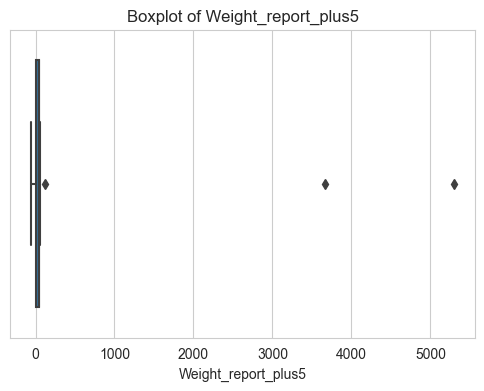

In [423]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_report_plus5'])
plt.title('Boxplot of Weight_report_plus5')
plt.xlabel('Weight_report_plus5')
plt.show()

In [424]:
df['Weight_report_plus5'].describe()

# Нельзя обрезать через интерквартильный размах, заполнение данными я так понимаю включают и итоговый вес, и значения +- вес в динамике, нужен другой подход

count     133.000000
mean       96.095865
std       553.438517
min       -55.250000
25%         3.200000
50%        39.150000
75%        45.600000
max      5296.400000
Name: Weight_report_plus5, dtype: float64

In [425]:
print(df['Weight_report_plus5'].median())
print(df['Weight_report_plus5'].mean())

39.15
96.09586466165413


In [426]:
df.Weight_report_plus5.head(300)

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
251   NaN
252   NaN
253   NaN
254   NaN
255   NaN
Name: Weight_report_plus5, Length: 254, dtype: float64

In [427]:
df = df.drop(236)

Вернемся к первым признакам, пойдем по порядку, этот признак пока под вопросом, но в целом картина довольно печальная по структуре и оформлению. 

In [429]:
df['ID'] = df['ID'].str.split('/').str.get(0)

In [430]:
df.isna().sum()

ID                            156
Date_of_birth                  60
Weight_on_buy                  81
Weight_on_3.01.17             113
Weight_in_plus                127
Weight_report_plus5           121
Weight_on_4.01.18              90
Weight_on_31.12.18             20
Lactation                     181
Weight_on_2_lact_31.12.16     185
Unnamed: 15                   192
Weight_on_lact1_31.12.17      181
Unnamed: 18                   182
Unnamed: 22                   188
Weight_on_2_lact2_31.12.18    188
dtype: int64

In [431]:
rows_with_nan = df[df['ID'].isnull()]

print(rows_with_nan)

      ID Date_of_birth Weight_on_buy Weight_on_3.01.17 Weight_in_plus  \
1    NaN    2015-01-30            50                59              9   
2    NaN    2015-01-31            52                55              3   
3    NaN    2015-02-03            55                56              1   
4    NaN    2015-02-03            44              44.2            0.2   
5    NaN    2015-02-04            48                50              2   
..   ...           ...           ...               ...            ...   
249  NaN           NaT           NaN               NaN            NaN   
251  NaN           NaT      07.05.18               1,8            NaN   
252  NaN           NaT      07.05.18               2,1            NaN   
253  NaN           NaT             м              2,15            NaN   
254  NaN           NaT           NaN               NaN            NaN   

     Weight_report_plus5 Weight_on_4.01.18 Weight_on_31.12.18 Lactation  \
1                    NaN             65.35      

In [432]:
random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

# Я понимаю, что использование случайных идентификаторов недопустимо, но в данном случае все равно придется искуственно увеличить данные, поэтому пусть они увеличатся таким образом после слияния всех файлов, там дополнительно обработаем пропуски, так как уже изменится среднее и медианное значение, будут дополнительные показатели и мы сможем это использовать. 

In [433]:
df.Date_of_birth.median()

Timestamp('2015-09-02 00:00:00')

In [434]:
median_date = df['Date_of_birth'].median()
df['Date_of_birth'].fillna(median_date, inplace=True)

In [435]:
df['Weight_on_buy'].head(300)

1            50
2            52
3            55
4            44
5            48
         ...   
251    07.05.18
252    07.05.18
253           м
254         NaN
255         NaN
Name: Weight_on_buy, Length: 253, dtype: object

In [436]:
df.loc[115:, 'Weight_on_buy'] = np.nan

In [437]:
print(df['Weight_on_buy'].mean())
print(df['Weight_on_buy'].median())

46.06194690265487
47.0


In [438]:
median_weight = df['Weight_on_buy'].median()
df['Weight_on_buy'].fillna(median_weight, inplace=True)

In [439]:
df['Weight_on_3.01.17'].head(300)

1        59
2        55
3        56
4      44.2
5        50
       ... 
251     1,8
252     2,1
253    2,15
254     NaN
255     NaN
Name: Weight_on_3.01.17, Length: 253, dtype: object

In [440]:
df.loc[115:, 'Weight_on_3.01.17'] = np.nan

In [441]:
print(df['Weight_on_3.01.17'].mean())
print(df['Weight_on_3.01.17'].median())

43.19823008849556
41.45


In [442]:
mean_weight = df['Weight_on_3.01.17'].median()
df['Weight_on_3.01.17'].fillna(mean_weight, inplace=True)

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 1 to 255
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          253 non-null    object        
 1   Date_of_birth               253 non-null    datetime64[ns]
 2   Weight_on_buy               253 non-null    float64       
 3   Weight_on_3.01.17           253 non-null    float64       
 4   Weight_in_plus              126 non-null    object        
 5   Weight_report_plus5         132 non-null    float64       
 6   Weight_on_4.01.18           163 non-null    object        
 7   Weight_on_31.12.18          233 non-null    object        
 8   Lactation                   72 non-null     object        
 9   Weight_on_2_lact_31.12.16   68 non-null     object        
 10  Unnamed: 15                 61 non-null     object        
 11  Weight_on_lact1_31.12.17    72 non-null     object        
 12 

In [444]:
df['Weight_in_plus'].head(300)

1        9
2        3
3        1
4      0.2
5        2
      ... 
251    NaN
252    NaN
253    NaN
254    NaN
255    NaN
Name: Weight_in_plus, Length: 253, dtype: object

In [445]:
df.loc[117:, 'Weight_in_plus'] = np.nan

In [446]:
print(df['Weight_in_plus'].mean())
print(df['Weight_in_plus'].median())

# Нужно брать медиану, так как использование динамики веса в -8 испортит всю статистику, но среднее тоже странно выглядит, нужно посмотреть выбросы

-8.909130434782611
-2.0


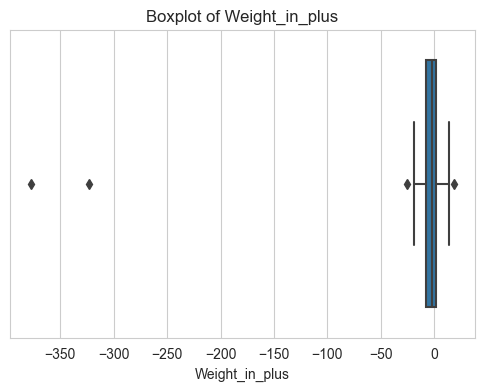

In [447]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_in_plus'])
plt.title('Boxplot of Weight_in_plus')
plt.xlabel('Weight_in_plus')
plt.show()

In [448]:
# Видно на диаграмме два сильных выброса, скорее всего это тоже обобщающие строки. Не будем удалять эти строки, заменим тоже на Nan и заполним по методу

df.loc[115:, 'Weight_in_plus'] = np.nan

In [449]:
print(df['Weight_in_plus'].mean())
print(df['Weight_in_plus'].median())

-2.8637168141592926
-2.0


In [450]:
median_weight = df['Weight_in_plus'].median()
df['Weight_in_plus'].fillna(median_weight, inplace=True)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 1 to 255
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          253 non-null    object        
 1   Date_of_birth               253 non-null    datetime64[ns]
 2   Weight_on_buy               253 non-null    float64       
 3   Weight_on_3.01.17           253 non-null    float64       
 4   Weight_in_plus              253 non-null    float64       
 5   Weight_report_plus5         132 non-null    float64       
 6   Weight_on_4.01.18           163 non-null    object        
 7   Weight_on_31.12.18          233 non-null    object        
 8   Lactation                   72 non-null     object        
 9   Weight_on_2_lact_31.12.16   68 non-null     object        
 10  Unnamed: 15                 61 non-null     object        
 11  Weight_on_lact1_31.12.17    72 non-null     object        
 12 

In [452]:
# Без комментариев почему этот столбец удаляется, проблема не в заполнении или статистических методах, так будет правильно по сути этого признака

df = df.drop('Weight_report_plus5', axis=1)

In [453]:
df['Weight_on_4.01.18'].head(300)

1      65.35
2       65.3
3         57
4       52.3
5       59.8
       ...  
251      NaN
252      NaN
253      NaN
254      NaN
255      NaN
Name: Weight_on_4.01.18, Length: 253, dtype: object

In [454]:
# Здесь нельзя после определенной строки весь мусор перевести в пропуски, так как значения перемешаны и есть важные данные, поэтому буквенные мы переводим в пропуски, остальное заполним методом

df['Weight_on_4.01.18'] = pd.to_numeric(df['Weight_on_4.01.18'], errors='coerce')

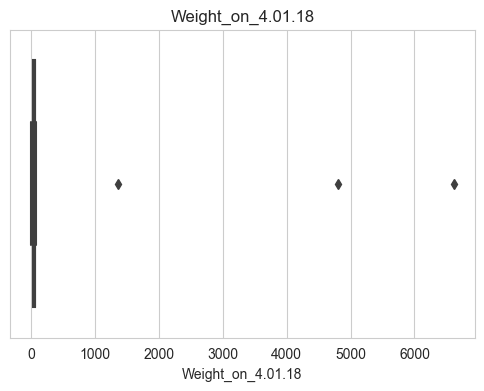

In [455]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_on_4.01.18'])
plt.title('Weight_on_4.01.18')
plt.xlabel('Weight_on_4.01.18')
plt.show()

In [456]:
# Видим сильные выбросы опять, заменим все значения больше 100

df.loc[df['Weight_on_4.01.18'] > 100, 'Weight_on_4.01.18'] = np.nan

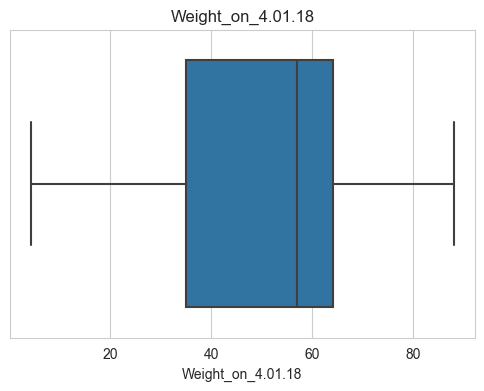

In [457]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_on_4.01.18'])
plt.title('Weight_on_4.01.18')
plt.xlabel('Weight_on_4.01.18')
plt.show()

In [458]:
print(df['Weight_on_4.01.18'].mean())
print(df['Weight_on_4.01.18'].median())

# Сложно выбрать, в целом тенденция большего веса всегда лучше, однако в данном случае это может испортить общую картину

51.05949367088608
57.0


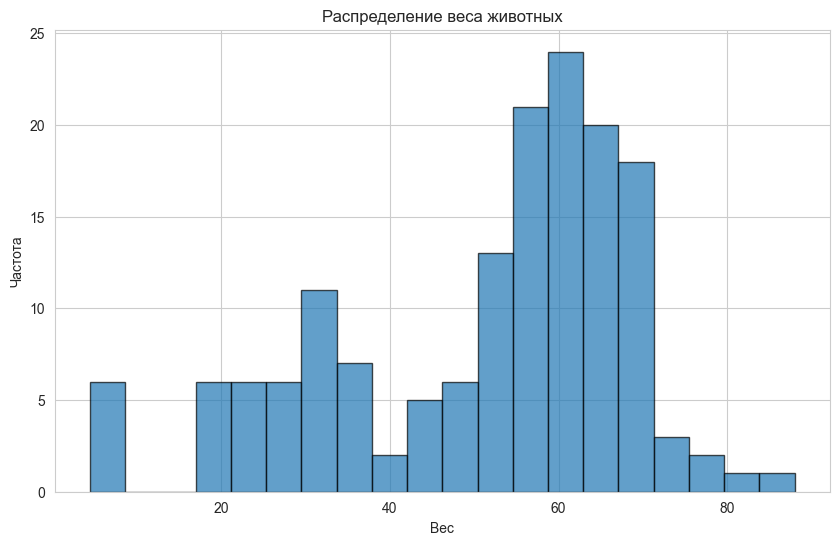

In [459]:
plt.figure(figsize=(10, 6))
plt.hist(df['Weight_on_4.01.18'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Распределение веса животных')
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

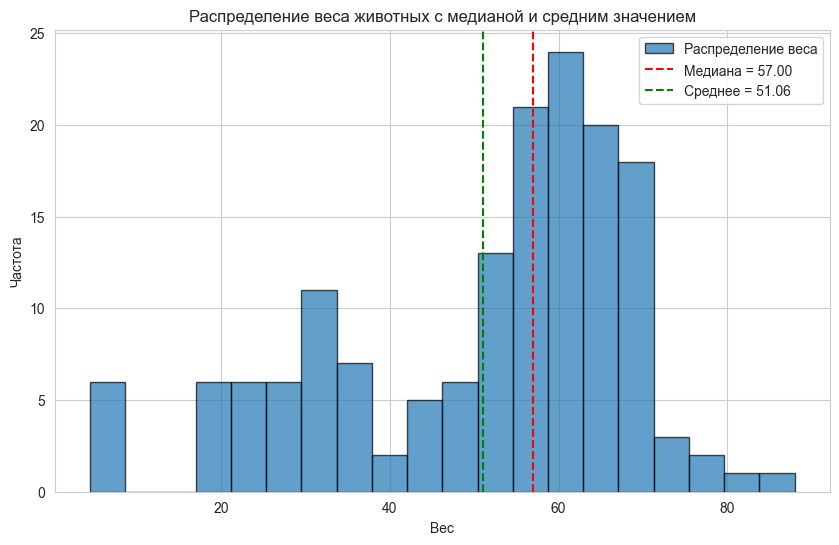

In [460]:
# Добавим среднее и медиану для лучшего понимания

plt.figure(figsize=(10, 6))
plt.hist(df['Weight_on_4.01.18'], bins=20, edgecolor='k', alpha=0.7, label='Распределение веса')

# Нахождение и отображение медианы и среднего значения
median_value = df['Weight_on_4.01.18'].median()
mean_value = df['Weight_on_4.01.18'].mean()

plt.axvline(median_value, color='r', linestyle='--', label=f'Медиана = {median_value:.2f}')
plt.axvline(mean_value, color='g', linestyle='--', label=f'Среднее = {mean_value:.2f}')

plt.title('Распределение веса животных с медианой и средним значением')
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

In [461]:
median_value = df['Weight_on_4.01.18'].median()
df['Weight_on_4.01.18'].fillna(median_value, inplace=True)

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 1 to 255
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          253 non-null    object        
 1   Date_of_birth               253 non-null    datetime64[ns]
 2   Weight_on_buy               253 non-null    float64       
 3   Weight_on_3.01.17           253 non-null    float64       
 4   Weight_in_plus              253 non-null    float64       
 5   Weight_on_4.01.18           253 non-null    float64       
 6   Weight_on_31.12.18          233 non-null    object        
 7   Lactation                   72 non-null     object        
 8   Weight_on_2_lact_31.12.16   68 non-null     object        
 9   Unnamed: 15                 61 non-null     object        
 10  Weight_on_lact1_31.12.17    72 non-null     object        
 11  Unnamed: 18                 71 non-null     float64       
 12 

In [463]:
df['Weight_on_31.12.18'].head(300)

1        61
2      65.1
3      60.2
4        52
5      99.5
       ... 
251      25
252      26
253      27
254     NaN
255      78
Name: Weight_on_31.12.18, Length: 253, dtype: object

In [464]:
df['Weight_on_31.12.18'] = pd.to_numeric(df['Weight_on_31.12.18'], errors='coerce')

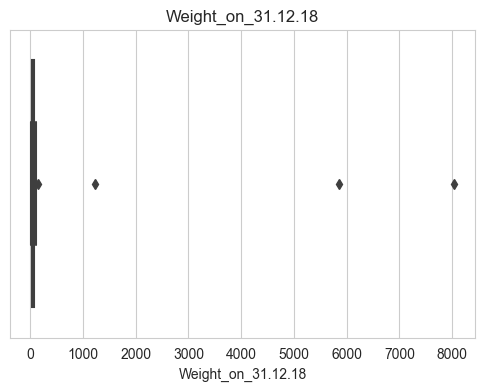

In [465]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_on_31.12.18'])
plt.title('Weight_on_31.12.18')
plt.xlabel('Weight_on_31.12.18')
plt.show()

In [466]:
# Видим сильные выбросы опять, заменим все значения больше 100

df.loc[df['Weight_on_31.12.18'] > 100, 'Weight_on_31.12.18'] = np.nan

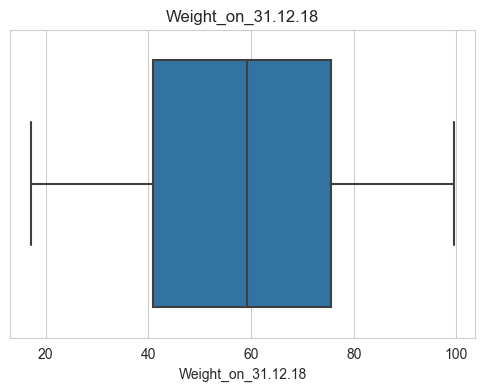

In [467]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_on_31.12.18'])
plt.title('Weight_on_31.12.18')
plt.xlabel('Weight_on_31.12.18')
plt.show()

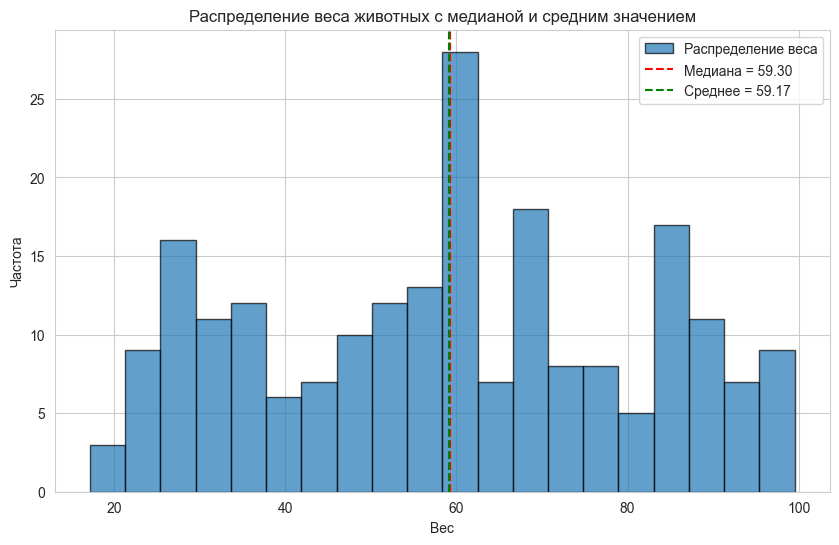

In [468]:
plt.figure(figsize=(10, 6))
plt.hist(df['Weight_on_31.12.18'], bins=20, edgecolor='k', alpha=0.7, label='Распределение веса')

# Нахождение и отображение медианы и среднего значения
median_value = df['Weight_on_31.12.18'].median()
mean_value = df['Weight_on_31.12.18'].mean()

plt.axvline(median_value, color='r', linestyle='--', label=f'Медиана = {median_value:.2f}')
plt.axvline(mean_value, color='g', linestyle='--', label=f'Среднее = {mean_value:.2f}')

plt.title('Распределение веса животных с медианой и средним значением')
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

In [469]:
mean_value = df['Weight_on_31.12.18'].mean()
df['Weight_on_31.12.18'].fillna(median_value, inplace=True)

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 1 to 255
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          253 non-null    object        
 1   Date_of_birth               253 non-null    datetime64[ns]
 2   Weight_on_buy               253 non-null    float64       
 3   Weight_on_3.01.17           253 non-null    float64       
 4   Weight_in_plus              253 non-null    float64       
 5   Weight_on_4.01.18           253 non-null    float64       
 6   Weight_on_31.12.18          253 non-null    float64       
 7   Lactation                   72 non-null     object        
 8   Weight_on_2_lact_31.12.16   68 non-null     object        
 9   Unnamed: 15                 61 non-null     object        
 10  Weight_on_lact1_31.12.17    72 non-null     object        
 11  Unnamed: 18                 71 non-null     float64       
 12 

In [471]:
df.Lactation.head(300)

1      2 лакт
2      2 лакт
3      2 лакт
4      2 лакт
5      2 лакт
        ...  
251       NaN
252       NaN
253       NaN
254       NaN
255       NaN
Name: Lactation, Length: 253, dtype: object

In [472]:
mode_value = df['Lactation'].mode()[0]  # Получаем первое значение из результата mode()
df['Lactation'].fillna(mode_value, inplace=True)

In [473]:
mask = (df['Lactation'] != '2 лакт') & (df['Lactation'] != '3 лакт')
df.loc[mask, 'Lactation'] = '2 лакт'

In [474]:
# Удаление слова "лакт" и преобразование столбца в целочисленный тип
df['Lactation'] = df['Lactation'].str.replace(' лакт', '', regex=False).astype(int)

In [475]:
df.Lactation.head()

1    2
2    2
3    2
4    2
5    2
Name: Lactation, dtype: int64

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 1 to 255
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          253 non-null    object        
 1   Date_of_birth               253 non-null    datetime64[ns]
 2   Weight_on_buy               253 non-null    float64       
 3   Weight_on_3.01.17           253 non-null    float64       
 4   Weight_in_plus              253 non-null    float64       
 5   Weight_on_4.01.18           253 non-null    float64       
 6   Weight_on_31.12.18          253 non-null    float64       
 7   Lactation                   253 non-null    int64         
 8   Weight_on_2_lact_31.12.16   68 non-null     object        
 9   Unnamed: 15                 61 non-null     object        
 10  Weight_on_lact1_31.12.17    72 non-null     object        
 11  Unnamed: 18                 71 non-null     float64       
 12 

In [477]:
df['Weight_on_lact1_31.12.17'].head(300)

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
251    NaN
252    NaN
253    NaN
254    NaN
255    NaN
Name: Weight_on_lact1_31.12.17, Length: 253, dtype: object

<Axes: >

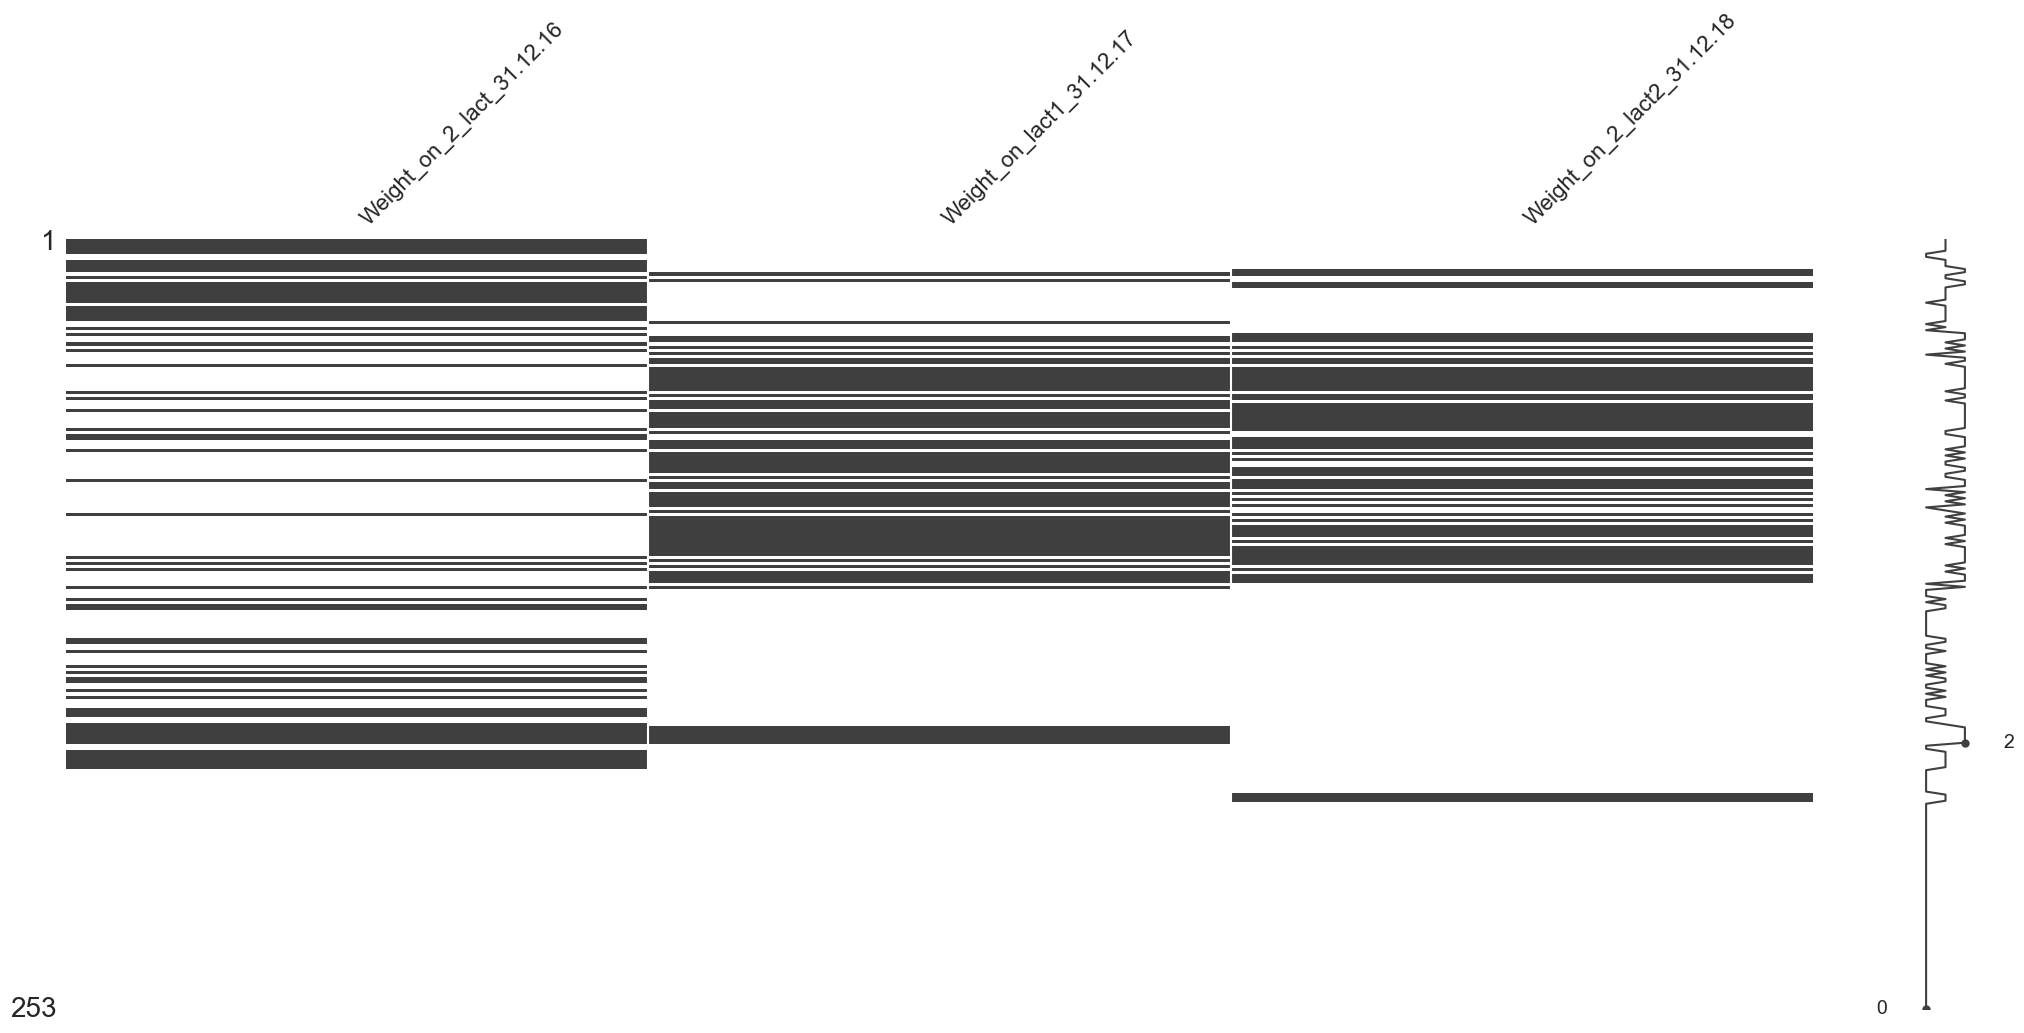

In [478]:
columns_to_visualize = ['Weight_on_2_lact_31.12.16', 'Weight_on_lact1_31.12.17', 'Weight_on_2_lact2_31.12.18']

# Отображаем матрицу пропущенных значений
msno.matrix(df[columns_to_visualize])

# получаем матрицу, видим, что где то значения перекликаются, поэтому чтобы не удалять все столбцы в связи с большим количеством пропусков в них, попробуем их объединить

In [479]:
df['Weight_on_2_lact_31.12.16'] = pd.to_numeric(df['Weight_on_2_lact_31.12.16'], errors='coerce')
df['Weight_on_lact1_31.12.17'] = pd.to_numeric(df['Weight_on_lact1_31.12.17'], errors='coerce')
df['Weight_on_2_lact2_31.12.18'] = pd.to_numeric(df['Weight_on_2_lact2_31.12.18'], errors='coerce')

In [480]:
df.loc[df['Weight_on_2_lact_31.12.16'] > 100, 'Weight_on_2_lact_31.12.16'] = np.nan
df.loc[df['Weight_on_lact1_31.12.17'] > 100, 'Weight_on_lact1_31.12.17'] = np.nan
df.loc[df['Weight_on_2_lact2_31.12.18'] > 100, 'Weight_on_2_lact2_31.12.18'] = np.nan

In [481]:
# Объединение трех столбцов в один
df['Combined_Column'] = pd.concat([df['Weight_on_2_lact_31.12.16'],
                                   df['Weight_on_lact1_31.12.17'],
                                   df['Weight_on_2_lact2_31.12.18']], axis=1).fillna(0).max(axis=1)


In [482]:
df['Combined_Column'].head(300)

1      59.0
2      55.0
3      56.0
4      44.2
5      50.0
       ... 
251     0.0
252     0.0
253     0.0
254     0.0
255     0.0
Name: Combined_Column, Length: 253, dtype: float64

In [483]:
columns_to_drop = ['Weight_on_2_lact_31.12.16', 'Weight_on_lact1_31.12.17', 'Weight_on_2_lact2_31.12.18']
df.drop(columns=columns_to_drop, inplace=True)

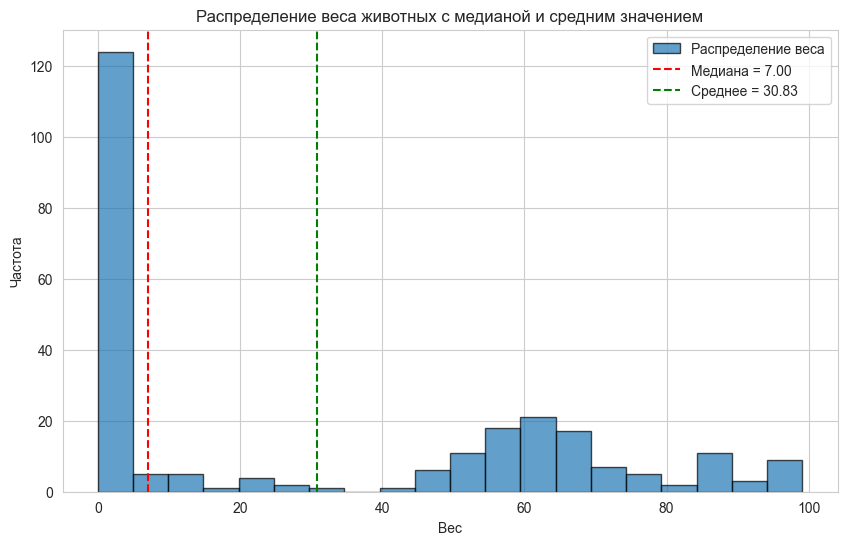

In [484]:
plt.figure(figsize=(10, 6))
plt.hist(df['Combined_Column'], bins=20, edgecolor='k', alpha=0.7, label='Распределение веса')

# Нахождение и отображение медианы и среднего значения
median_value = df['Combined_Column'].median()
mean_value = df['Combined_Column'].mean()

plt.axvline(median_value, color='r', linestyle='--', label=f'Медиана = {median_value:.2f}')
plt.axvline(mean_value, color='g', linestyle='--', label=f'Среднее = {mean_value:.2f}')

plt.title('Распределение веса животных с медианой и средним значением')
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

In [485]:
mean_value = df['Combined_Column'].mean()
df['Combined_Column'] = df['Combined_Column'].replace(0, mean_value)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 1 to 255
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  253 non-null    object        
 1   Date_of_birth       253 non-null    datetime64[ns]
 2   Weight_on_buy       253 non-null    float64       
 3   Weight_on_3.01.17   253 non-null    float64       
 4   Weight_in_plus      253 non-null    float64       
 5   Weight_on_4.01.18   253 non-null    float64       
 6   Weight_on_31.12.18  253 non-null    float64       
 7   Lactation           253 non-null    int64         
 8   Unnamed: 15         61 non-null     object        
 9   Unnamed: 18         71 non-null     float64       
 10  Unnamed: 22         65 non-null     object        
 11  Combined_Column     253 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 33.8+ KB


In [487]:
df['Unnamed: 15'].head(300)

# Слишком много пропусков, рандомный набор чисел похожий на индексацию с суммированием, спасти не получится

1        1
2        2
3        3
4        4
5        5
      ... 
251    NaN
252    NaN
253    NaN
254    NaN
255    NaN
Name: Unnamed: 15, Length: 253, dtype: object

In [488]:
df = df.drop('Unnamed: 15', axis=1)

In [489]:
df['Unnamed: 18'].head(300)

# Аналогично

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
251   NaN
252   NaN
253   NaN
254   NaN
255   NaN
Name: Unnamed: 18, Length: 253, dtype: float64

In [490]:
df = df.drop('Unnamed: 18', axis=1)

In [491]:
df['Unnamed: 22'].head(300)

# Тоже ничего полезного отсюда не вытащить

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
251    NaN
252    NaN
253    NaN
254    NaN
255    NaN
Name: Unnamed: 22, Length: 253, dtype: object

In [492]:
df = df.drop('Unnamed: 22', axis=1)

In [493]:
df.head(50)

,ID,Date_of_birth,Weight_on_buy,Weight_on_3.01.17,Weight_in_plus,Weight_on_4.01.18,Weight_on_31.12.18,Lactation,Combined_Column
1,70,2015-01-30,50.0,59.00,9.00,65.35,61.00,2,59.000000
2,87,2015-01-31,52.0,55.00,3.00,65.30,65.10,2,55.000000
3,78,2015-02-03,55.0,56.00,1.00,57.00,60.20,2,56.000000
4,68,2015-02-03,44.0,44.20,0.20,52.30,52.00,2,44.200000
5,9,2015-02-04,48.0,50.00,2.00,59.80,99.50,2,50.000000
6,99,2015-02-05,54.0,47.50,-6.50,66.40,88.00,3,30.829064
7,72,2015-02-06,53.0,48.80,-4.20,58.10,67.00,3,30.829064
8,46,2015-01-08,60.0,68.50,8.50,72.70,86.00,2,68.500000
9,24,2015-03-02,48.0,56.35,8.35,56.70,48.60,2,56.350000
10,48,2015-02-10,45.0,49.50,4.50,57.35,70.10,2,49.500000


In [494]:
df.isna().sum().sum()

0

In [495]:
df.to_csv('Clean_data/File_1.csv')

Подводя итог имеем какой-то более менее адекватно выглядящий файл, постарал спасти каждую строку, каждое значение, каждый признак, на мой взгляд получилось вполне успешно при наличии данных такого вида
____________________________________________

In [10]:
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Дата рождения': 'Date_of_birth'})
df = df.drop('№', axis=1)
df = df.rename(columns={'вес ': 'Weight'})
df = df.rename(columns={'вес на 31.12.18': 'Weight_on_31.12.18'})
df = df.drop(31)
df = df.drop(0)
df = df.rename(columns={'привес': 'Weight_in_plus'})
df = df.rename(columns={'вес на 31.12.19': 'Weight_on_31.12.19'})
df = df.rename(columns={'вес 3 лакт и выше': 'Weight_on_3lact_31.12.18'})
df = df.rename(columns={'вес 2 лакт': 'Weight_2lact'})
df = df.rename(columns={'вес 1 лакт': 'Weight_1lact'})

In [11]:
df = df.drop('ID', axis=1)
df.head(10)

,Date_of_birth,Weight,Weight_on_31.12.18,Weight_in_plus,Weight_on_31.12.19,Unnamed: 7,Unnamed: 8,Номер козы.1,Unnamed: 10,Unnamed: 11,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Weight_on_3lact_31.12.18,Unnamed: 18,Weight_2lact,Weight_1lact,Unnamed: 21,Unnamed: 22,Unnamed: 23
1,2015-01-30 00:00:00,50,61,NaN,NaN,NaN,NaN,5016,NaN,NaN,...,NaN,NaN,1.0,61,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-31 00:00:00,52,65.1,NaN,NaN,NaN,NaN,5020,NaN,NaN,...,NaN,NaN,2.0,65.1,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-03 00:00:00,55,60.2,NaN,NaN,NaN,NaN,5051,NaN,NaN,...,NaN,NaN,3.0,60.2,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-03 00:00:00,44,52,NaN,NaN,NaN,NaN,5055,NaN,NaN,...,NaN,NaN,4.0,52,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-02-04 00:00:00,48,99.5,NaN,NaN,умерла,NaN,5059,NaN,NaN,...,NaN,NaN,5.0,99.5,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-02-05 00:00:00,54,88,NaN,NaN,NaN,NaN,5065,NaN,NaN,...,NaN,NaN,6.0,88,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-02-06 00:00:00,53,67,NaN,NaN,NaN,NaN,5079,NaN,NaN,...,NaN,NaN,7.0,67,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-08 00:00:00,60,86,NaN,NaN,NaN,NaN,5091,NaN,NaN,...,NaN,NaN,8.0,86,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-03-02 00:00:00,48,48.6,NaN,NaN,NaN,NaN,5092,NaN,NaN,...,NaN,NaN,9.0,48.6,NaN,NaN,NaN,NaN,NaN,NaN
10,2015-02-10 00:00:00,45,70.1,NaN,NaN,NaN,NaN,5099,NaN,NaN,...,NaN,NaN,10.0,70.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_threshold = 0.75 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

In [501]:
df.shape

(322, 5)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 1 to 323
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  282 non-null    object
 1   Date_of_birth       281 non-null    object
 2   Weight              287 non-null    object
 3   Weight_on_31.12.18  218 non-null    object
 4   Номер козы.1        197 non-null    object
dtypes: object(5)
memory usage: 15.1+ KB


In [503]:
df = df.drop('Номер козы.1', axis=1)

In [504]:
df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'], errors='coerce')

In [505]:
df.isna().sum()

ID                     40
Date_of_birth          54
Weight                 35
Weight_on_31.12.18    104
dtype: int64

In [507]:
rows_with_nan = df[df['ID'].isnull()]

print(rows_with_nan)

      ID Date_of_birth               Weight  \
115  NaN           NaT                 3626   
116  NaN           NaT                 5205   
117  NaN           NaT                  NaN   
118  NaN           NaT                  NaN   
119  NaN           NaT             вес при    
120  NaN           NaT             рождении   
126  NaN           NaT                  NaN   
127  NaN           NaT                  NaN   
128  NaN           NaT                  NaN   
129  NaN           NaT                  NaN   
130  NaN           NaT             вес при    
131  NaN           NaT             рождении   
174  NaN           NaT                  NaN   
175  NaN           NaT                114.4   
176  NaN           NaT                  NaN   
177  NaN           NaT                  NaN   
178  NaN           NaT                  NaN   
179  NaN           NaT     вес при рождении   
217  NaN           NaT                  NaN   
218  NaN           NaT               104.65   
219  NaN     

In [508]:
df['ID'] = df['ID'].str.split('/').str.get(0)

In [509]:
random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 1 to 323
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  322 non-null    object        
 1   Date_of_birth       268 non-null    datetime64[ns]
 2   Weight              287 non-null    object        
 3   Weight_on_31.12.18  218 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 12.6+ KB


In [511]:
median_date = df['Date_of_birth'].median()
df['Date_of_birth'].fillna(median_date, inplace=True)

In [512]:
df.Weight

1       50
2       52
3       55
4       44
5       48
      ... 
319    NaN
320    NaN
321    NaN
322    NaN
323    NaN
Name: Weight, Length: 322, dtype: object

In [513]:
df.loc[115:, 'Weight'] = np.nan

In [514]:
print(df['Weight'].mean())
print(df['Weight'].median())

46.06194690265487
47.0


In [515]:
median_weight = df['Weight'].median()
df['Weight'].fillna(median_weight, inplace=True)

In [516]:
df['Weight_on_31.12.18'].head(300)

# Я вижу что колонка дублируется, но здесь больше строк = больше данных, подумаю как с ней поступить позже, возможно лучше будет удалить из первого файла.

1          61
2        65.1
3        60.2
4          52
5        99.5
        ...  
297    92.125
298       NaN
299       NaN
300       NaN
301       NaN
Name: Weight_on_31.12.18, Length: 300, dtype: object

In [517]:
df['Weight_on_31.12.18'] = pd.to_numeric(df['Weight_on_31.12.18'], errors='coerce')

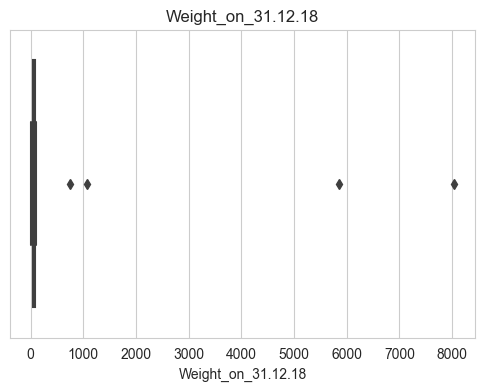

In [518]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight_on_31.12.18'])
plt.title('Weight_on_31.12.18')
plt.xlabel('Weight_on_31.12.18')
plt.show()

In [519]:
# Видим сильные выбросы опять, заменим все значения больше 100

df.loc[df['Weight_on_31.12.18'] > 100, 'Weight_on_31.12.18'] = np.nan

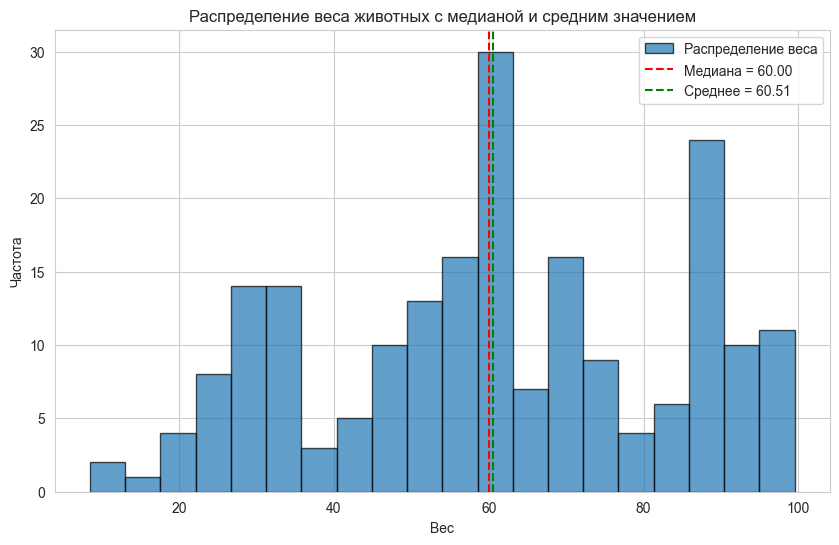

In [520]:
plt.figure(figsize=(10, 6))
plt.hist(df['Weight_on_31.12.18'], bins=20, edgecolor='k', alpha=0.7, label='Распределение веса')

# Нахождение и отображение медианы и среднего значения
median_value = df['Weight_on_31.12.18'].median()
mean_value = df['Weight_on_31.12.18'].mean()

plt.axvline(median_value, color='r', linestyle='--', label=f'Медиана = {median_value:.2f}')
plt.axvline(mean_value, color='g', linestyle='--', label=f'Среднее = {mean_value:.2f}')

plt.title('Распределение веса животных с медианой и средним значением')
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

In [521]:
mean_value = df['Weight_on_31.12.18'].mean()
df['Weight_on_31.12.18'].fillna(median_value, inplace=True)

In [523]:
df.isna().sum().sum()

0

In [524]:
df.to_csv('Clean_data/File_2.csv')

Второй файл завершен
_______________

In [14]:
df = df.drop('№', axis=1)
df = df.drop(31)
df = df.drop(32)
df = df.drop(0)
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Дата рождения': 'Date_of_birth'})
df = df.rename(columns={'вес ': 'Weight_on_buy'})
df = df.rename(columns={'вес .1': 'Weight_on_3.01.17'})
df = df.rename(columns={'Unnamed: 6': 'Weight_report_plus5'})
df = df.rename(columns={'вес .2': 'Weight_on_4.01.18'})
df = df.rename(columns={'Привес': 'Weight_in_plus'})
df = df.rename(columns={'Привес.1': 'Weight_in_plus1'})
df = df.rename(columns={'вес на 31.12.18': 'Weight_on_31.12.18'})
df = df.rename(columns={'вес 3 лакт': 'Weight_on_3_lact'})
df = df.rename(columns={'вес 2 лакт': 'Weight_on_2_lact_31.12.16'})
df = df.rename(columns={'вес 2 лакт.1': 'Weight_on_2_lact_31.12.17'})
df = df.rename(columns={'вес 3 лакт и выше': 'Weight_on_3_lact_heigher_31.12.18'})
df = df.rename(columns={'вес 2 лакт.2': 'Weight_on_2_lact2_31.12.18'})
df = df.rename(columns={'вес 1 лакт': 'Weight_on_lact1_31.12.17'})
df = df.rename(columns={'вес 1 лакт.1': 'Weight_on_lact1_31.12.18'})

In [16]:
df = df.drop('ID', axis=1)
df.head(10)

,Date_of_birth,Weight_on_buy,Weight_on_3.01.17,Weight_in_plus,Weight_report_plus5,Weight_on_4.01.18,Weight_in_plus1,Unnamed: 9,Weight_on_3_lact,Unnamed: 11,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
1,2015-01-30 00:00:00,50,59,9,NaN,65.35,6.35,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-31 00:00:00,52,55,3,NaN,65.3,10.3,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-02-03 00:00:00,55,56,1,NaN,57,1,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-03 00:00:00,44,44.2,0.2,NaN,52.3,8.1,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-02-04 00:00:00,48,50,2,NaN,59.8,9.8,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-02-05 00:00:00,54,47.5,-6.5,47.5,66.4,18.9,NaN,66.4,3 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-02-06 00:00:00,53,48.8,-4.2,48.8,58.1,9.3,NaN,58.1,3 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-08 00:00:00,60,68.5,8.5,NaN,72.7,4.2,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-03-02 00:00:00,48,56.35,8.35,NaN,56.7,0.35,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2015-02-10 00:00:00,45,49.5,4.5,NaN,57.35,7.85,NaN,NaN,2 лакт,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [529]:
df.shape

(216, 39)

In [ ]:
missing_threshold = 0.75 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

In [531]:
df.isna().sum()

ID                           38
Date_of_birth                54
Weight_on_buy               101
Weight_on_3.01.17            88
Weight_in_plus               93
Weight_report_plus5          77
Weight_on_4.01.18            37
Weight_in_plus1              79
Weight_on_3_lact            160
Unnamed: 11                 126
Weight_on_lact1_31.12.17    140
Unnamed: 16                 149
Unnamed: 21                 116
Unnamed: 22                  95
Unnamed: 24                 116
Unnamed: 25                 153
Unnamed: 26                 158
Unnamed: 27                 153
dtype: int64

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 1 to 218
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        178 non-null    object
 1   Date_of_birth             162 non-null    object
 2   Weight_on_buy             115 non-null    object
 3   Weight_on_3.01.17         128 non-null    object
 4   Weight_in_plus            123 non-null    object
 5   Weight_report_plus5       139 non-null    object
 6   Weight_on_4.01.18         179 non-null    object
 7   Weight_in_plus1           137 non-null    object
 8   Weight_on_3_lact          56 non-null     object
 9   Unnamed: 11               90 non-null     object
 10  Weight_on_lact1_31.12.17  76 non-null     object
 11  Unnamed: 16               67 non-null     object
 12  Unnamed: 21               100 non-null    object
 13  Unnamed: 22               121 non-null    object
 14  Unnamed: 24               100 n

Здесь размерность меньше чем в 1 файле, поэтому можем удалить дублирующиеся колонки

In [533]:
df = df.drop('Date_of_birth', axis=1)
df = df.drop('Weight_on_buy', axis=1)
df = df.drop('Weight_on_3.01.17', axis=1)
df = df.drop('Weight_report_plus5', axis=1)
df = df.drop('Weight_on_4.01.18', axis=1)

In [535]:
df.isna().sum()

ID                           38
Weight_in_plus               93
Weight_in_plus1              79
Weight_on_3_lact            160
Unnamed: 11                 126
Weight_on_lact1_31.12.17    140
Unnamed: 16                 149
Unnamed: 21                 116
Unnamed: 22                  95
Unnamed: 24                 116
Unnamed: 25                 153
Unnamed: 26                 158
Unnamed: 27                 153
dtype: int64

In [536]:
df['ID'] = df['ID'].str.split('/').str.get(0)

In [537]:
random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [538]:
df.Weight_in_plus.head(300)

1        9
2        3
3        1
4      0.2
5        2
      ... 
214    NaN
215    NaN
216    NaN
217    NaN
218    NaN
Name: Weight_in_plus, Length: 216, dtype: object

In [539]:
df['New_ID'] = df['ID'].combine_first(df['Unnamed: 24'])

# Unnamed: 24 похожа на колонку с уникальными идентификаторами животных, но вытащить это оттуда не представляется возможным, остальные колонки тоже не имеют никакой информативности, возьмем только полезные

In [540]:
df.New_ID

1               2
2              86
3               4
4              40
5              77
          ...    
214             6
215            21
216           53А
217    54А безрог
218           55А
Name: New_ID, Length: 216, dtype: object

In [ ]:
new_df = df[['ID', 'Weight_in_plus', 'Weight_in_plus1']].copy()
new_df

In [542]:
new_df.Weight_in_plus

1        9
2        3
3        1
4      0.2
5        2
      ... 
214    NaN
215    NaN
216    NaN
217    NaN
218    NaN
Name: Weight_in_plus, Length: 216, dtype: object

In [543]:
new_df.loc[116:, 'Weight_in_plus'] = np.nan

In [544]:
print(new_df['Weight_in_plus'].mean())
print(new_df['Weight_in_plus'].median())
print(new_df['Weight_in_plus'].mode())

-2.8637168141592926
-2.0
0    2
Name: Weight_in_plus, dtype: object


In [545]:
median_weight = new_df['Weight_in_plus'].median()
new_df['Weight_in_plus'].fillna(median_weight, inplace=True)

In [546]:
new_df.Weight_in_plus1

1      6.35
2      10.3
3         1
4       8.1
5       9.8
       ... 
214     NaN
215     NaN
216     NaN
217     NaN
218     NaN
Name: Weight_in_plus1, Length: 216, dtype: object

In [547]:
new_df.loc[116:, 'Weight_in_plus1'] = np.nan

In [548]:
print(new_df['Weight_in_plus1'].mean())
print(new_df['Weight_in_plus1'].median())

14.23849557522124
15.049999999999997


In [549]:
median_weight = new_df['Weight_in_plus1'].median()
new_df['Weight_in_plus1'].fillna(median_weight, inplace=True)

In [551]:
new_df.isna().sum().sum()

0

In [552]:
new_df.to_csv('Clean_data/File_3.csv')

Третий файл завершен
______

In [19]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо ': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [21]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Unnamed: 3,лев. ухо,Unnamed: 5,Unnamed: 6,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 11,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2019.0,К933,02.08.21,К933,NaN,NaN,02.01.22,м,К21,3.35,NaN,NaN,NaN
2,NaN,NaN,NaN,2019.0,К933,02.08.21,К933,NaN,NaN,02.01.22,ж,22001,3.15,NaN,NaN,NaN
3,NaN,NaN,NaN,2020.0,К15,09.08.21,К15,NaN,NaN,06.01.22,м,К28,4.10,NaN,NaN,NaN
4,NaN,NaN,NaN,2020.0,К15,09.08.21,К15,NaN,NaN,06.01.22,м,К29,2.70,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Списываем козу,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,2019.0,К934,2021-09-06 00:00:00,К934,NaN,NaN,2022-02-06 00:00:00,м,К261,3.70,NaN,NaN,NaN
7,NaN,NaN,NaN,2019.0,К934,2021-09-06 00:00:00,К934,NaN,NaN,2022-02-06 00:00:00,м,К262,3.20,NaN,NaN,NaN
8,NaN,NaN,NaN,2019.0,К934,2021-09-06 00:00:00,К934,NaN,NaN,2022-02-06 00:00:00,м,К263,3.00,NaN,NaN,NaN
9,NaN,NaN,NaN,2019.0,К934,2021-08-25 00:00:00,К934,NaN,NaN,2022-01-25 00:00:00,м,К227,3.30,NaN,NaN,NaN


In [ ]:
missing_threshold = 0.75 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

In [ ]:
df = df[['ID', 'Unnamed: 6', 'Number_male', 'ID_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [560]:
df = df.drop(0)

# 3 Столбца у нас это идентификатор самцов, возьмем тот, где меньше пропусков изначально и заполним модой пропуски

In [561]:
df.isna().sum()

ID                     1
Unnamed: 6            99
Number_male          100
ID_male              142
Weight_of_progeny    142
Sex_progeny          133
dtype: int64

In [ ]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [563]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [564]:
df.Number_male

1      К933
2      К933
3       К15
4       К15
5       NaN
       ... 
521    СГ23
522    СГ23
523    СГ23
524     246
525     246
Name: Number_male, Length: 525, dtype: object

In [565]:
most_common_value = df['Number_male'].mode()[0]  # Получаем самое популярное значение
df['Number_male'].fillna(most_common_value, inplace=True)  # Заполняем пропуски этим значением

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 1 to 525
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 525 non-null    object 
 1   Number_male        525 non-null    object 
 2   Weight_of_progeny  383 non-null    float64
 3   Sex_progeny        392 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.5+ KB


In [567]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2.8018276762402095
2.7


In [568]:
mean_weight = df['Weight_of_progeny'].mean()
df['Weight_of_progeny'].fillna(mean_weight, inplace=True)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 1 to 525
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 525 non-null    object 
 1   Number_male        525 non-null    object 
 2   Weight_of_progeny  525 non-null    float64
 3   Sex_progeny        392 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.5+ KB


In [570]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'м'

In [571]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 25.33%


In [572]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)  # Заполняем пропуски этим значением

In [573]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'ж'

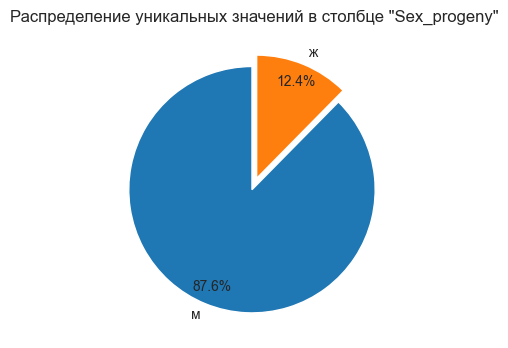

In [574]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [576]:
df.isna().sum().sum()

0

In [577]:
df.to_csv('Clean_data/File_4.csv')

Четвертый файл завершен

____________

In [24]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [25]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Left_ear,Unnamed: 4,Unnamed: 5,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 10,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2015.0,СГ23,02.05.18,СГ23,NaN,NaN,02.10.18,м,8167,"2,91",NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2015.0,СГ23,02.05.18,СГ23,NaN,NaN,03.10.18,ж,NaN,"1,595",мертворожд,NaN,NaN,NaN,NaN
3,NaN,NaN,2015.0,СГ23,01.06.18,СГ23,NaN,NaN,15.09.18,NaN,NaN,NaN,выкидыш,NaN,NaN,NaN,NaN
4,NaN,NaN,2016.0,246,04.06.18,246,NaN,NaN,04.11.18,м,8169,"4,1",NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2015.0,246,23.06.18,246,NaN,NaN,23.11.18,м,8172,"2,96",NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2015.0,75,19.08.18,75,NaN,NaN,19.01.19,м,К91,"3,6",NaN,NaN,NaN,NaN,1.0
7,NaN,NaN,2015.0,75,19.08.18,75,NaN,NaN,19.01.19,ж,9001,"2,6",NaN,NaN,NaN,NaN,2.0
8,NaN,NaN,2016.0,246,25.08.18,246,NaN,NaN,25.01.19,ж,9002,"3,235",NaN,NaN,NaN,NaN,3.0
9,NaN,NaN,2016.0,246,28.08.18,246,NaN,NaN,28.01.19,м,К92,"3,6",NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_threshold = 0.75 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

In [583]:
df = df.drop(0)

In [ ]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [585]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [586]:
most_common_value = df['Number_male'].mode()[0]  # Получаем самое популярное значение
df['Number_male'].fillna(most_common_value, inplace=True)

In [587]:
df.Weight_of_progeny

1       2,91
2      1,595
3        NaN
4        4,1
5       2,96
       ...  
224      NaN
225      NaN
226     3,05
227     2,65
228      NaN
Name: Weight_of_progeny, Length: 228, dtype: object

In [588]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [589]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

3.0476190476190474
3.0


In [590]:
mean_weight = df['Weight_of_progeny'].mean()
df['Weight_of_progeny'].fillna(mean_weight, inplace=True)

In [591]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'м'

In [592]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 19.30%


In [593]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)

In [594]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'ж'

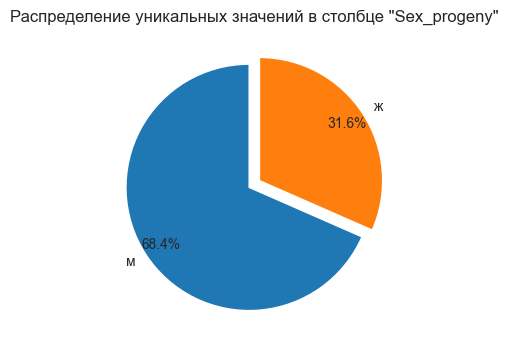

In [595]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [597]:
df.isna().sum().sum()

0

In [598]:
df.to_csv('Clean_data/File_5.csv')

Пятый файл завершен
____

In [28]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [29]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Left_ear,Unnamed: 4,Unnamed: 5,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 10,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2016.0,246,01.01.19,246,NaN,NaN,20.02.19,NaN,NaN,NaN,выкидыш,NaN,NaN,2 раза в году,NaN,NaN
2,NaN,NaN,2017.0,h069,2019-02-08 00:00:00,h069,NaN,NaN,08.07.19,ж,9070,"1,2",NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2016.0,246,2019-05-30 00:00:00,246,NaN,NaN,20.07.19,NaN,NaN,NaN,выкидыш,NaN,NaN,факт не было,NaN,NaN
4,NaN,NaN,2016.0,246,2019-06-21 00:00:00,246,NaN,NaN,16.11.19,м,К9107,"3,05",NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2016.0,246,2019-06-21 00:00:00,246,NaN,NaN,16.11.19,м,К9108,"2,65",NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2015.0,75,2019-07-02 00:00:00,75,NaN,NaN,26.11.19,ж,9071,"3,05",NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2015.0,75,2019-07-02 00:00:00,75,NaN,NaN,26.11.19,ж,9072,"2,6",NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,2016.0,246,2019-08-21 00:00:00,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_threshold = 0.75 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

In [604]:
df = df.drop(0)

In [ ]:
df = df[['ID', 'Number_male', 'ID_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [606]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [607]:
most_common_value = df['Number_male'].mode()[0]  # Получаем самое популярное значение
df['Number_male'].fillna(most_common_value, inplace=True)

In [608]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [609]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2.7800000000000002
2.9


In [610]:
median_weight = df['Weight_of_progeny'].median()
df['Weight_of_progeny'].fillna(median_weight, inplace=True)

In [611]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'м'

In [612]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 67.19%


In [613]:
df = df.dropna(subset=['Sex_progeny'])

# Слишком много пропусков в потомстве, проще удалить строки с пропусками и использовать данные при объединении, может быть потерянный ID будет совпадать 

In [615]:
df.isna().sum().sum()

0

In [616]:
df.to_csv('Clean_data/File_6.csv')

Шестой файл завершен
___

In [32]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [33]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Left_ear,Unnamed: 4,Unnamed: 5,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 10,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,25.01.20,ж,0027,"3,2",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,25.01.20,м,К47,"3,4",NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2016.0,246,2019-08-21 00:00:00,246,NaN,NaN,24.02.20,м,К63,"1,2",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,02.03.20,м,К64,"1,6",NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,27.01.20,м,К54,"3,55",NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,25.01.20,м,К44,"3,0",NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,25.01.20,ж,0026,"1,95",NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,27.01.20,м,К55,"3,5",NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,2015.0,75,2019-08-21 00:00:00,75,NaN,NaN,09.02.20,м,К59,"3,55",NaN,NaN,NaN,NaN,NaN,NaN


In [621]:
df = df.drop(0)

In [ ]:
missing_threshold = 0.75 * len(df)
columns_to_drop = df.columns[df.isna().sum() > missing_threshold]

# Удаление найденных колонок из датафрейма
df.drop(columns=columns_to_drop, inplace=True)

df.head()

In [623]:
df.isna().sum()

ID                     36
Unnamed: 4            226
Unnamed: 5             17
Date_of_copulation     23
Number_male           226
Unnamed: 10            35
Sex_progeny            36
ID_male                35
Weight_of_progeny      35
dtype: int64

In [624]:
df = df.drop('Number_male', axis=1)

In [625]:
df = df.rename(columns={'ID_male': 'Number_male'})

In [ ]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [627]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [628]:
most_common_value = df['Number_male'].mode()[0]  # Получаем самое популярное значение
df['Number_male'].fillna(most_common_value, inplace=True)

In [629]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [630]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2.5357142857142856
2.5


In [631]:
mean_weight = df['Weight_of_progeny'].mean()
df['Weight_of_progeny'].fillna(mean_weight, inplace=True)

In [632]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'м'

In [633]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 6.09%


In [634]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)

In [635]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'ж'

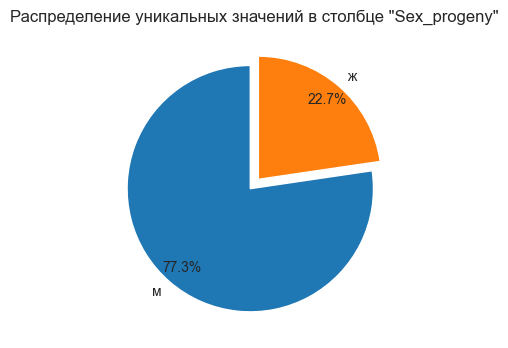

In [636]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [638]:
df.isna().sum().sum()

0

In [639]:
df.to_csv('Clean_data/File_7.csv')

Седьмой файл завершен
____

In [36]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [37]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Left_ear,Unnamed: 4,Unnamed: 5,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 10,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 14
0,NaN,NaN,NaN,199,NaN,NaN,NaN,NaN,2016-08-10 00:00:00,ж,G001,"3,1",NaN
1,NaN,NaN,NaN,F180,NaN,NaN,NaN,NaN,2016-08-12 00:00:00,ж,G002,"2,95",NaN
2,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-11 00:00:00,ж,G002|1,"2,5",NaN
3,NaN,NaN,NaN,199,NaN,NaN,NaN,NaN,2016-08-15 00:00:00,ж,G003,2.7,NaN
4,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-17 00:00:00,м,G004,3.15,NaN
5,NaN,NaN,NaN,199,NaN,NaN,NaN,NaN,2016-08-17 00:00:00,м,G005,2.95,NaN
6,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-19 00:00:00,ж,G006,2.25,NaN
7,NaN,NaN,NaN,F180,NaN,NaN,NaN,NaN,2016-08-21 00:00:00,м,G007,3.25,NaN
8,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-24 00:00:00,ж,G008,3,NaN
9,NaN,NaN,NaN,F180,NaN,NaN,NaN,NaN,2016-08-28 00:00:00,ж,G009,3.1,NaN


In [644]:
df = df.drop('Number_male', axis=1)
df = df.rename(columns={'Unnamed: 5': 'Number_male'})

In [645]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

,ID,Number_male,Weight_of_progeny,Sex_progeny
0,H057,199,"3,1",ж
1,H505,F180,"2,95",ж
2,H299,F172,"2,5",ж
3,H013,199,2.7,ж
4,H227,F172,3.15,м
...,...,...,...,...
162,Н299,973,"2,1",ж
163,5189,973,"2,6",ж
164,5189,973,"2,3",ж
165,5189,973,"2,75",ж


In [646]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [647]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2.802325581395349
2.8


In [648]:
median_weight = df['Weight_of_progeny'].median()
df['Weight_of_progeny'].fillna(median_weight, inplace=True)

In [649]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'ж'

In [650]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 5.39%


In [651]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)

In [652]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'м'

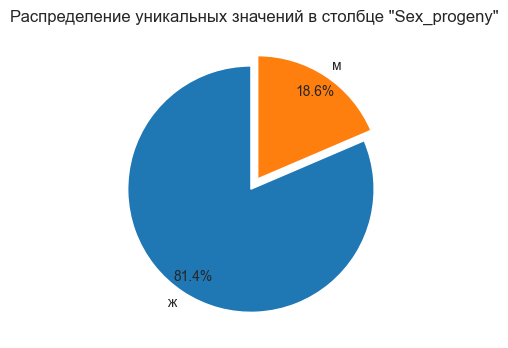

In [653]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [655]:
df.isna().sum().sum()

0

In [656]:
df.to_csv('Clean_data/File_8.csv')

Восьмой файл завершен
___

In [40]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [41]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Left_ear,Unnamed: 4,Unnamed: 5,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 10,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 14
0,NaN,NaN,NaN,199,NaN,NaN,NaN,NaN,2016-08-10 00:00:00,ж,G001,"3,1",NaN
1,NaN,NaN,NaN,F180,NaN,NaN,NaN,NaN,2016-08-12 00:00:00,ж,G002,"2,95",NaN
2,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-11 00:00:00,ж,G002|1,"2,5",NaN
3,NaN,NaN,NaN,199,NaN,NaN,NaN,NaN,2016-08-15 00:00:00,ж,G003,2.7,NaN
4,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-17 00:00:00,м,G004,3.15,NaN
5,NaN,NaN,NaN,199,NaN,NaN,NaN,NaN,2016-08-17 00:00:00,м,G005,2.95,NaN
6,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-19 00:00:00,ж,G006,2.25,NaN
7,NaN,NaN,NaN,F180,NaN,NaN,NaN,NaN,2016-08-21 00:00:00,м,G007,3.25,NaN
8,NaN,NaN,NaN,F172,NaN,NaN,NaN,NaN,2016-08-24 00:00:00,ж,G008,3,NaN
9,NaN,NaN,NaN,F180,NaN,NaN,NaN,NaN,2016-08-28 00:00:00,ж,G009,3.1,NaN


In [661]:
df = df.drop('Number_male', axis=1)
df = df.rename(columns={'Unnamed: 5': 'Number_male'})

In [ ]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [663]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [664]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2.802325581395349
2.8


In [665]:
median_weight = df['Weight_of_progeny'].median()
df['Weight_of_progeny'].fillna(median_weight, inplace=True)

In [666]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'ж'

In [667]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 5.39%


In [668]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)

In [669]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'ж'

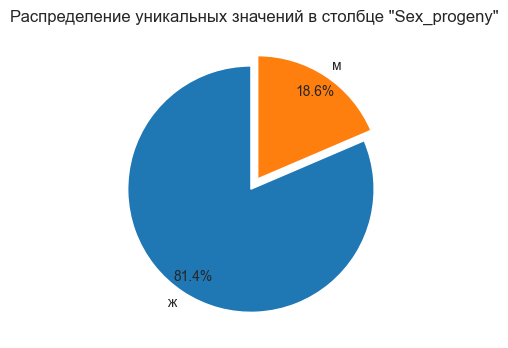

In [670]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [671]:
df.isna().sum().sum()

0

In [672]:
df.to_csv('Clean_data/File_9.csv')

Девятый файл завершен
___

In [44]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [45]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Unnamed: 3,Left_ear,Unnamed: 5,Unnamed: 6,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 11,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5.0,2019.0,К925,08.08.20,К925,NaN,NaN,08.01.21,м,К211,"3,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,К925,17.10.20,NaN,NaN,NaN,17.03.21,ж,21030,"1,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,К925,17.10.20,NaN,NaN,NaN,17.03.21,ж,21031,"2,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,К914,09.11.20,NaN,NaN,NaN,09.04.21,ж,21041,"4,05",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,СГ23,30.12.20,NaN,NaN,NaN,04.06.21,м,К298,"2,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,СГ23,30.12.20,NaN,NaN,NaN,04.06.21,м,К299,"2,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,СГ23,30.12.20,NaN,NaN,NaN,04.06.21,м,К300,"2,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,СГ23,30.12.20,NaN,NaN,NaN,04.06.21,м,К295,"2,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,СГ23,30.12.20,NaN,NaN,NaN,04.06.21,м,К296,"2,6",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [677]:
df = df.drop(0)

In [678]:
df = df.drop('Number_male', axis=1)
df = df.rename(columns={'Unnamed: 6': 'Number_male'})

In [679]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [ ]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [681]:
df = df.dropna(subset=['ID'])

In [683]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [684]:
most_common_value = df['Number_male'].mode()[0]  # Получаем самое популярное значение
df['Number_male'].fillna(most_common_value, inplace=True)

In [685]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [686]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2.9457142857142857
2.9


In [687]:
mean_weight = df['Weight_of_progeny'].mean()
df['Weight_of_progeny'].fillna(mean_weight, inplace=True)

In [688]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'м'

In [689]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 35.05%


In [690]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)

In [691]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'ж'

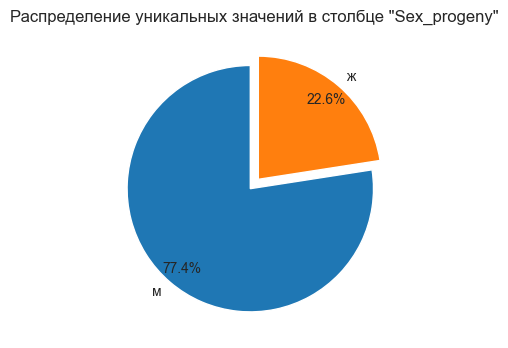

In [692]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [693]:
df.isna().sum().sum()

0

In [694]:
df.to_csv('Clean_data/File_10.csv')

Десятый файл завершен
___

In [48]:
df = df.rename(columns={'бирка': 'ID'})
df = df.rename(columns={'пр. ухо': 'Right_ear'})
df = df.rename(columns={'лев. ухо': 'Left_ear'})
df = df.rename(columns={'дата': 'Date_of_copulation'})
df = df.rename(columns={'№ козла': 'Number_male'})
df = df.rename(columns={'дата.1': 'Date_1'})
df = df.rename(columns={'№ козла.1': 'Number_male1'})
df = df.rename(columns={'пол': 'Sex_progeny'})
df = df.rename(columns={'инд.№': 'ID_male'})
df = df.rename(columns={'ж.м. (кг)': 'Weight_of_progeny'})
df = df.drop('Unnamed: 0', axis=1)

In [49]:
df = df.drop('ID', axis=1)
df.head(10)

,Right_ear,Left_ear,Unnamed: 4,Unnamed: 5,Date_of_copulation,Number_male,Date_1,Number_male1,Unnamed: 10,Sex_progeny,ID_male,Weight_of_progeny,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,2015.0,973,23.09.16,973.0,NaN,NaN,23.02.17,м,h 060,2000.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.02.17,м,h 059,2400.0,NaN,NaN,NaN
2,NaN,NaN,2015.0,973,23.09.16,973.0,NaN,NaN,21.03.17,ж,h 088,2950.0,NaN,NaN,через 6 мес?
3,NaN,NaN,2015.0,973,23.09.16,973.0,26.09.16,973.0,16.02.17,м,h 058,1900.0,умер17.02.17,NaN,NaN
4,NaN,NaN,2015.0,973,24.09.16,973.0,14.10.16,973.0,02.02.17,NaN,выкидыш,NaN,NaN,NaN,2.02.17 скинула двойню
5,NaN,NaN,2015.0,973,24.09.16,973.0,NaN,NaN,21.02.17,м,мертвр,NaN,NaN,NaN,NaN
6,NaN,NaN,2015.0,973,25.09.16,973.0,NaN,NaN,03.02.17,NaN,выкидыш,NaN,NaN,NaN,3.02.17 скинула
7,NaN,NaN,2015.0,973,25.09.16,973.0,NaN,NaN,23.02.17,м,h 065,2900.0,NaN,NaN,NaN
8,NaN,NaN,2015.0,973,26.09.16,973.0,NaN,NaN,23.02.17,м,h 062,2600.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.02.17,ж,h 063,1500.0,NaN,NaN,NaN


In [699]:
df = df.dropna(subset=['ID'])

In [700]:
df = df.drop('Number_male', axis=1)
df = df.rename(columns={'Unnamed: 5': 'Number_male'})

In [ ]:
df = df[['ID', 'Number_male', 'Weight_of_progeny', 'Sex_progeny']].copy()
df

In [702]:
df['ID'] = df['ID'].str.split('/').str.get(0)

random_values = np.random.randint(1, 100, df['ID'].isnull().sum())

# Заполнение NaN случайными значениями
df.loc[df['ID'].isnull(), 'ID'] = random_values

In [703]:
most_common_value = df['Number_male'].mode()[0]  # Получаем самое популярное значение
df['Number_male'].fillna(most_common_value, inplace=True)

In [704]:
df['Weight_of_progeny'] = pd.to_numeric(df['Weight_of_progeny'], errors='coerce')

In [705]:
print(df['Weight_of_progeny'].mean())
print(df['Weight_of_progeny'].median())

2890.1785714285716
2825.0


In [706]:
mean_weight = df['Weight_of_progeny'].mean()
df['Weight_of_progeny'].fillna(mean_weight, inplace=True)

In [707]:
most_common_value = df['Sex_progeny'].mode()[0]  # Получаем самое популярное значение
most_common_value

'ж'

In [708]:
total_rows = len(df['Sex_progeny'])
missing_values_count = df['Sex_progeny'].isna().sum()

percentage_missing = (missing_values_count / total_rows) * 100
print(f"Процент пропусков в столбце 'Sex_progeny': {percentage_missing:.2f}%")

Процент пропусков в столбце 'Sex_progeny': 24.68%


In [709]:
df['Sex_progeny'].fillna(most_common_value, inplace=True)

In [710]:
mask = ~df['Sex_progeny'].isin(['м', 'ж'])

# Заменяем значения, которые не "м" и не "ж", на "ж"
df.loc[mask, 'Sex_progeny'] = 'м'

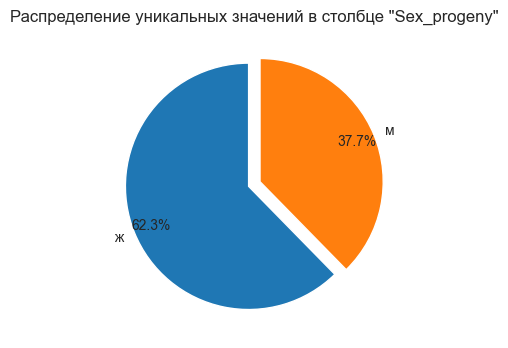

In [711]:
value_counts = df['Sex_progeny'].value_counts(dropna=False)

# Создание круговой диаграммы
plt.figure(figsize=(6, 4))
value_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=[0.05]*len(value_counts))
plt.title('Распределение уникальных значений в столбце "Sex_progeny"')
plt.ylabel('')  # Удаление надписи для оси Y
plt.show()

In [712]:
df.isna().sum().sum()

0

In [713]:
df.to_csv('Clean_data/File_11.csv')

Одиннадцатый файл завершен
___

In [52]:
df = df.drop(30)
df = df.drop(31)
df = df.drop(' п\\п', axis=1)
df = df.rename(columns={'Unnamed: 1': 'ID'})
df = df.rename(columns={'утро': 'Morning_17.01.17'})
df = df.rename(columns={'полдень': 'Afternoon_17.01.17'})
df = df.rename(columns={'вечер': 'Evening_17.01.17'})
df = df.rename(columns={'Всего': 'Total_17.01.17'})

df = df.rename(columns={'утро.1': 'Morning_18.02.17'})
df = df.rename(columns={'полдень.1': 'Afternoon_18.02.17'})
df = df.rename(columns={'вечер.1': 'Evening_18.02.17'})
df = df.rename(columns={'Всего.1': 'Total_18.02.17'})

df = df.rename(columns={'утро.2': 'Morning_21.03.17'})
df = df.rename(columns={'полдень.2': 'Afternoon_21.03.17'})
df = df.rename(columns={'вечер.2': 'Evening_21.03.17'})
df = df.rename(columns={'Всего.2': 'Total_21.03.17'})

df = df.rename(columns={'утро.3': 'Morning_20.04.17'})
df = df.rename(columns={'полдень.3': 'Afternoon_20.04.17'})
df = df.rename(columns={'вечер.3': 'Evening_20.04.17'})
df = df.rename(columns={'Всего.3': 'Total_20.04.17'})

df = df.rename(columns={'утро.4': 'Morning_27.05.17'})
df = df.rename(columns={'полдень.4': 'Afternoon_27.05.17'})
df = df.rename(columns={'вечер.4': 'Evening_27.05.17'})
df = df.rename(columns={'Всего.4': 'Total_27.05.17'})

df = df.rename(columns={'утро.5': 'Morning_26.06.17'})
df = df.rename(columns={'полдень.5': 'Afternoon_26.06.17'})
df = df.rename(columns={'вечер.5': 'Evening_26.06.17'})
df = df.rename(columns={'Всего.5': 'Total_26.06.17'})

df = df.rename(columns={'утро.6': 'Morning_20.07.17'})
df = df.rename(columns={'полдень.6': 'Afternoon_20.07.17'})
df = df.rename(columns={'вечер.6': 'Evening_20.07.17'})
df = df.rename(columns={'Всего.6': 'Total_20.07.17'})

df = df.rename(columns={'утро.7': 'Morning_21.08.17'})
df = df.rename(columns={'полдень.7': 'Afternoon_21.08.17'})
df = df.rename(columns={'вечер.7': 'Evening_21.08.17'})
df = df.rename(columns={'Всего.7': 'Total_21.08.17'})

df = df.rename(columns={'утро.8': 'Morning_20.09.17'})
df = df.rename(columns={'полдень.8': 'Afternoon_20.09.17'})
df = df.rename(columns={'вечер.8': 'Evening_20.09.17'})
df = df.rename(columns={'Всего.8': 'Total_20.09.17'})

df = df.rename(columns={'утро.9': 'Morning_26.10.17'})
df = df.rename(columns={'полдень.9': 'Afternoon_26.10.17'})
df = df.rename(columns={'вечер.9': 'Evening_26.10.17'})
df = df.rename(columns={'Всего.9': 'Total_26.10.17'})

df = df.rename(columns={'утро.10': 'Morning_15.11.17'})
df = df.rename(columns={'полдень.10': 'Afternoon_15.11.17'})
df = df.rename(columns={'вечер.10': 'Evening_15.11.17'})
df = df.rename(columns={'Всего.10': 'Total_15.11.17'})

df = df.rename(columns={'утро.11': 'Morning_31.12.17'})
df = df.rename(columns={'полдень.11': 'Afternoon_31.12.17'})
df = df.rename(columns={'вечер.11': 'Evening_31.12.17'})
df = df.rename(columns={'Всего.11': 'Total_31.12.17'})

df = df.rename(columns={'1 коза': 'Mean_per_1'})

In [53]:
df = df.drop('ID', axis=1)
df.head(10)

,Morning_17.01.17,Afternoon_17.01.17,Evening_17.01.17,Total_17.01.17,Morning_18.02.17,Afternoon_18.02.17,Evening_18.02.17,Total_18.02.17,Morning_21.03.17,Afternoon_21.03.17,...,Total_15.11.17,Morning_31.12.17,Afternoon_31.12.17,Evening_31.12.17,Total_31.12.17,Unnamed: 52,Unnamed: 53,Mean_per_1,Unnamed: 55,Unnamed: 56
0,0.5,0.3,0.5,1.3,0.5,0.2,0.0,0.7,NaN,NaN,...,2.1,1.0,0.7,0.3,2.0,25.4,11.0,2.309091,1.0,NaN
1,0.9,0.4,0.2,1.5,0.0,0.0,0.0,0.0,NaN,NaN,...,2.2,1.0,0.8,0.4,2.2,22.1,10.0,2.210000,2.0,NaN
2,1.0,1.0,0.9,2.9,1.0,0.9,0.8,2.7,NaN,NaN,...,0.2,0.1,0.0,0.0,0.1,7.3,9.0,0.811111,3.0,NaN
3,0.6,0.5,0.2,1.3,0.5,0.5,0.3,1.3,0.5,0.4,...,0.1,NaN,NaN,NaN,0.0,4.9,9.0,0.544444,4.0,NaN
4,1.0,0.8,0.7,2.5,0.9,0.7,0.7,2.3,NaN,NaN,...,0.1,NaN,NaN,NaN,0.0,7.4,9.0,0.822222,5.0,NaN
5,0.9,0.7,0.5,2.1,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,1.5,0.7,0.6,2.8,6.9,11.0,0.627273,6.0,NaN
6,1.0,0.7,0.6,2.3,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,1.0,1.0,0.9,2.9,7.0,11.0,0.636364,7.0,NaN
7,0.6,0.6,0.6,1.8,0.4,0.4,0.4,1.2,NaN,NaN,...,2.5,0.9,0.7,0.6,2.2,23.2,10.0,2.320000,8.0,NaN
8,0.5,0.1,0.1,0.7,0.1,0.0,0.5,0.6,NaN,NaN,...,2.5,1.0,0.9,0.6,2.5,21.5,10.0,2.150000,9.0,NaN
9,1.0,0.8,0.5,2.3,0.9,0.8,0.4,2.1,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,5.8,10.0,0.580000,10.0,NaN


In [ ]:
df = df[['ID', 'Mean_per_1']]
df

In [719]:
df = df.dropna(subset='ID')

In [720]:
print(df['Mean_per_1'].median())
print(df['Mean_per_1'].mean())

1.7555555555555555
1.6066377398321845


In [ ]:
median_date = df['Mean_per_1'].median()
df['Mean_per_1'] = df['Mean_per_1'].fillna(median_date)

In [722]:
df.to_csv('Clean_data/Target_1.csv')

Первый таргет завершен
___

In [56]:
df = df.rename(columns={'Unnamed: 1': 'ID'})
df = df.rename(columns={'надои': 'Mean_per_1'})
df = df.drop(30)
df = df.drop(31)
df = df.drop(' п\\п', axis=1)

In [57]:
df = df.drop('ID', axis=1)
df.head(10)

,утро,полдень,вечер,Всего,утро.1,полдень.1,вечер.1,Всего.1,утро.2,полдень.2,...,полдень.5,вечер.5,Всего.5,утро.6,полдень.6,вечер.6,Всего.6,Unnamed: 31,мес.,Mean_per_1
0,0.6,0.4,0.4,1.4,0.9,0.5,0.3,1.7,0.9,0.2,...,0.3,0.2,1.6,1.1,0.3,0.1,1.5,10.0,7.0,1.428571
1,0.5,0.4,0.5,1.4,0.9,0.4,0.3,1.6,0.8,0.2,...,0.3,0.2,1.7,1.0,0.4,0.3,1.7,10.9,7.0,1.557143
2,1.3,0.9,0.7,2.9,1.0,1.0,0.9,2.9,0.9,1.0,...,0.9,0.9,2.9,1.0,1.0,0.9,2.9,20.1,7.0,2.871429
3,0.6,0.4,0.2,1.2,0.4,0.3,0.2,0.9,0.9,0.4,...,0.4,0.3,1.6,0.9,0.3,0.1,1.3,9.4,7.0,1.342857
4,1.2,0.9,0.5,2.6,1.1,0.9,0.6,2.6,1.0,0.9,...,0.9,0.7,2.6,1.0,0.8,0.8,2.6,18.2,7.0,2.600000
5,0.9,0.7,0.5,2.1,1.0,0.7,0.5,2.2,1.1,0.7,...,0.6,0.5,2.1,1.0,0.6,0.5,2.1,15.1,7.0,2.157143
6,1.5,0.6,0.6,2.7,1.6,0.5,0.5,2.6,1.4,0.6,...,0.8,0.6,2.4,1.0,0.7,0.6,2.3,17.5,7.0,2.500000
7,0.7,0.6,0.5,1.8,0.8,0.8,0.3,1.9,0.9,0.7,...,0.7,0.2,1.8,0.8,0.6,0.3,1.7,13.1,7.0,1.871429
8,1.0,0.5,0.3,1.8,1.0,0.4,0.4,1.8,1.0,0.5,...,0.5,0.4,1.8,0.8,0.5,0.5,1.8,12.7,7.0,1.814286
9,1.0,0.8,0.7,2.5,0.9,0.9,0.7,2.5,0.9,0.9,...,0.8,0.8,2.5,0.9,0.9,0.7,2.5,17.7,7.0,2.528571


In [ ]:
df = df[['ID', 'Mean_per_1']]
df

In [728]:
df = df.dropna(subset='ID')

In [729]:
df.isna().sum()

ID             0
Mean_per_1    17
dtype: int64

In [730]:
df.to_csv('Clean_data/Target_2.csv')

Второй таргет завершен
___

In [60]:
df = df.rename(columns={'Unnamed: 1': 'ID'})
df = df.rename(columns={'1 коза': 'Mean_per_1'})
df = df.drop(30)
df = df.drop(31)
df = df.drop(' п\\п', axis=1)

In [61]:
df = df.drop('ID', axis=1)
df.head(10)

,утро,полдень,вечер,Всего,утро.1,полдень.1,вечер.1,Всего.1,утро.2,полдень.2,...,Всего.11,надои,мес,Mean_per_1,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,6.0,0.000000,2.6,NaN,5016,NaN,NaN,NaN
1,0.9,0.8,0.5,2.2,NaN,NaN,NaN,0.0,1.0,0.7,...,2.1,24.8,6.0,4.133333,2.3,NaN,5020,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,2.9,23.2,8.0,2.900000,NaN,NaN,5051,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.8,0.7,...,2.2,22.9,10.0,2.290000,2.3,NaN,5055,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,1.0,...,2.7,28.8,6.0,4.800000,2.6,запуск вык,5059,NaN,NaN,NaN
5,1.5,0.8,0.5,2.8,1.4,0.9,0.5,2.8,1.4,0.8,...,2.6,33.2,12.0,2.766667,2.8,NaN,5065,NaN,NaN,NaN
6,1.2,1.0,0.7,2.9,1.2,1.0,0.7,2.9,1.1,1.0,...,2.7,34.4,12.0,2.866667,3.1,NaN,5079,NaN,NaN,NaN
7,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.3,1.1,...,2.4,28.5,10.0,2.850000,2.5,NaN,5091,NaN,NaN,NaN
8,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.3,0.9,...,0.0,20.0,7.0,2.857143,2.5,NaN,5092,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.9,...,0.0,24.9,6.0,4.150000,2.8,NaN,5099,NaN,NaN,NaN


In [ ]:
df = df[['ID', 'Mean_per_1']]
df

In [735]:
df = df.dropna(subset='ID')

In [736]:
median_date = df['Mean_per_1'].median()
df['Mean_per_1'].fillna(median_date)

0      0.000000
1      4.133333
2      2.900000
3      2.290000
4      4.800000
         ...   
138    1.466667
139    1.590000
140    1.600000
141    2.184444
142    2.184444
Name: Mean_per_1, Length: 138, dtype: float64

In [737]:
df.to_csv('Clean_data/Target_3.csv')

Третий таргет завершен
___

In [64]:
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Ср надои': 'Mean_per_1'})
df = df.rename(columns={'класс': 'Class'})
df = df.rename(columns={'жир': 'Fat'})
df = df.rename(columns={'белок': 'Protein'})
df = df.rename(columns={'лактация.1': 'Lact_count'})
df = df.rename(columns={'Всего надои': 'Total_yield'})
df = df.rename(columns={'число': 'Count_of_month'})
df = df.drop(30)
df = df.drop(0)

In [65]:
df = df.drop('ID', axis=1)
df.head(10)

,Unnamed: 0,лактация,Class,Дата:30.01.19,Unnamed: 5,Unnamed: 6,Unnamed: 7,Номер козы.1,Дата:18.02.19,Unnamed: 10,...,4лактация.1,Unnamed: 116,3лактация и выше.3,Unnamed: 118,2лактация.4,Unnamed: 120,Unnamed: 121,1лактация.4,Unnamed: 123,Unnamed: 124
1,NaN,4лакт,I,NaN,NaN,NaN,0,5016,NaN,NaN,...,NaN,1,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4лакт,I,NaN,NaN,NaN,0,5020,NaN,NaN,...,NaN,2,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN
3,вык16.2.19,NaN,Э,1.5,0.8,0.6,2.9,5051,1.5,0.8,...,NaN,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ум,NaN,I,0.8,0.6,0.4,1.8,5055,0.6,0.4,...,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN
5,вык19.12.18,NaN,Э,0.9,0.8,0.6,2.3,5059,0.7,0.6,...,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4лакт,Э,NaN,NaN,NaN,0,5065,NaN,NaN,...,1,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,4лакт,Э,NaN,NaN,NaN,0,5079,NaN,NaN,...,2,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,не рож,NaN,Э,0.7,0.6,0.4,1.7,5091,0.5,0.4,...,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,4лакт,Э,NaN,NaN,NaN,0,5092,NaN,NaN,...,3,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,4лакт,Э,NaN,NaN,NaN,0,5099,NaN,NaN,...,4,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [741]:
df = df[['ID', 'Mean_per_1', 'Class', 'Fat', 'Protein', 'Lact_count', 'Total_yield', 'Count_of_month']]

In [743]:
df.shape

(182, 8)

In [744]:
df.isna().sum()

ID                13
Mean_per_1        14
Class             46
Fat               18
Protein           18
Lact_count        17
Total_yield       15
Count_of_month    14
dtype: int64

In [ ]:
target = df[['ID', 'Mean_per_1']]
target

In [746]:
target = target.dropna(subset='ID')

In [747]:
print(target.Mean_per_1.mean())
print(target.Mean_per_1.median())

3.1066167954135016
2.05


In [748]:
mean_weight = target['Mean_per_1'].mean()
target['Mean_per_1'].fillna(mean_weight)

1      0.410000
2      0.000000
3      1.058333
4      0.550000
5      0.675000
         ...   
169    1.712500
170    1.622222
171    1.700000
173    3.106617
174    3.106617
Name: Mean_per_1, Length: 169, dtype: float64

In [749]:
target.to_csv('Clean_data/Target_4.csv')

Этот файл уйдет в основные данные, а не в таргет

In [750]:
df = df.drop('Mean_per_1', axis=1)

In [751]:
df = df.dropna(subset='ID')

In [753]:
most_common_value = df['Class'].mode()[0]  # Получаем самое популярное значение
most_common_value

'Э '

In [754]:
df['Class'].fillna(most_common_value, inplace=True)

In [755]:
print(df['Fat'].mean())
print(df['Fat'].median())

3.579878048780488
3.6


In [756]:
median_weight = df['Fat'].median()
df['Fat'].fillna(median_weight, inplace=True)

In [757]:
print(df['Protein'].mean())
print(df['Protein'].median())

3.094939024390244
3.1


In [758]:
median_weight = df['Protein'].median()
df['Protein'].fillna(median_weight, inplace=True)

In [759]:
mode_value = df['Lact_count'].mode()[0]  # Получаем первое значение из результата mode()
df['Lact_count'].fillna(mode_value, inplace=True)

In [760]:
mode_value

'3лакт'

In [761]:
df['Lact_count'].unique()

array(['4лакт', 3, 2, 1, '3лакт', '2лакт', '3 лакт', '3лакт/4лакт кг',
       '1/2лакт', '3лакт кг', '1лакт'], dtype=object)

In [762]:
df['Lact_count'] = df['Lact_count'].str.replace('лакт', '').str.strip()

In [763]:
df['Lact_count'] = df['Lact_count'].apply(lambda x: x if x in ['1', '2', '3', '4'] else '3')

In [764]:
df['Lact_count'] = df['Lact_count'].astype(int)

In [765]:
df['Lact_count'].unique()

array([4, 3, 2, 1])

In [766]:
print(df.Total_yield.mean())
print(df.Total_yield.median())

692.5306939793807
732.0


In [767]:
median_date = df['Total_yield'].median()
df['Total_yield'].fillna(median_date, inplace=True)

In [768]:
print(df.Count_of_month.mean())
print(df.Count_of_month.median())

9.706586826347305
10.0


In [769]:
median_date = df['Count_of_month'].median()
df['Count_of_month'].fillna(median_date, inplace=True)

In [770]:
df.to_csv('Clean_data/File_12.csv')

Двенадцатый файл завершен
___

In [68]:
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Ср надои': 'Mean_per_1'})
df = df.rename(columns={'класс': 'Class'})
df = df.rename(columns={'жир': 'Fat'})
df = df.rename(columns={'белок': 'Protein'})
df = df.rename(columns={'лактация.1': 'Lact_count'})
df = df.rename(columns={'Всего надои': 'Total_yield'})
df = df.rename(columns={'число': 'Count_of_month'})
df = df.drop(30)
df = df.drop(0)

In [69]:
df = df.drop('ID', axis=1)
df.head(10)

,Unnamed: 0,лактация,Class,Дата:04.01.20,Unnamed: 5,Unnamed: 6,Unnamed: 7,Номер козы.1,Дата:20.02.20,Unnamed: 10,...,Вес на,3лактация и выше.3,Unnamed: 125,Unnamed: 126,2лактация.4,Unnamed: 128,Unnamed: 129,1лактация.4,Unnamed: 131,Unnamed: 132
1,NaN,4лакт,I,NaN,NaN,NaN,0,5016,NaN,NaN,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4лакт,I,NaN,NaN,NaN,0,5020,NaN,NaN,...,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,вык16.2.19,NaN,Э,1.5,0.8,0.6,2.9,5051,1.5,0.8,...,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ум,NaN,I,0.8,0.6,0.4,1.8,5055,0.6,0.4,...,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,вык19.12.18,NaN,Э,0.9,0.8,0.6,2.3,5059,0.7,0.6,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4лакт,Э,NaN,NaN,NaN,0,5065,NaN,NaN,...,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,4лакт,Э,NaN,NaN,NaN,0,5079,NaN,NaN,...,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,не рож,NaN,Э,0.7,0.6,0.4,1.7,5091,0.5,0.4,...,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,4лакт,Э,NaN,NaN,NaN,0,5092,NaN,NaN,...,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,4лакт,Э,NaN,NaN,NaN,0,5099,NaN,NaN,...,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['ID', 'Mean_per_1', 'Class', 'Fat', 'Protein', 'Lact_count', 'Total_yield', 'Count_of_month']]

In [775]:
df = df.dropna(subset='ID')

In [776]:
df = df.drop('Mean_per_1', axis=1)

In [777]:
most_common_value = df['Class'].mode()[0]  # Получаем самое популярное значение
most_common_value
df['Class'].fillna(most_common_value, inplace=True)
print(df['Fat'].mean())
print(df['Fat'].median())
median_weight = df['Fat'].median()
df['Fat'].fillna(median_weight, inplace=True)
print(df['Protein'].mean())
print(df['Protein'].median())
median_weight = df['Protein'].median()
df['Protein'].fillna(median_weight, inplace=True)

3.5836683417085426
3.6
3.092613065326634
3.1


In [779]:
mode_value = df['Lact_count'].mode()[0]  # Получаем первое значение из результата mode()
df['Lact_count'].fillna(mode_value, inplace=True)
mode_value
df['Lact_count'].unique()
df['Lact_count'] = df['Lact_count'].apply(lambda x: x if x in ['1', '2', '3', '4'] else '3')
df['Lact_count'] = df['Lact_count'].str.replace('лакт', '', regex=False)
df['Lact_count'] = df['Lact_count'].astype(int)
df['Lact_count'].unique()
print(df.Total_yield.mean())
print(df.Total_yield.median())
median_date = df['Total_yield'].median()
df['Total_yield'].fillna(median_date, inplace=True)
print(df.Count_of_month.mean())
print(df.Count_of_month.median())
median_date = df['Count_of_month'].median()
df['Count_of_month'].fillna(median_date, inplace=True)

583.7498033120125
643.5500000000001
9.573033707865168
10.0


In [781]:
df.to_csv('Clean_data/File_13.csv')

Тринадцатый файл завершен
___

In [72]:
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Ср надои': 'Mean_per_1'})
df = df.rename(columns={'класс': 'Class'})
df = df.rename(columns={'жир': 'Fat'})
df = df.rename(columns={'белок': 'Protein'})
df = df.rename(columns={'лактация.1': 'Lact_count'})
df = df.rename(columns={'Всего надои': 'Total_yield'})
df = df.rename(columns={'число': 'Count_of_month'})
df = df.drop(30)
df = df.drop(0)

In [73]:
df = df.drop('ID', axis=1)
df.head(10)

,Unnamed: 0,лактация,Class,Дата:04.01.20,Unnamed: 5,Unnamed: 6,Unnamed: 7,Номер козы.1,Дата:20.02.20,Unnamed: 10,...,3лактация и выше.3,Unnamed: 125,Unnamed: 126,2лактация.4,Unnamed: 128,Unnamed: 129,1лактация.4,Unnamed: 131,Unnamed: 132,Unnamed: 133
1,NaN,4лакт,I,NaN,NaN,NaN,0,5016,NaN,NaN,...,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4лакт,I,NaN,NaN,NaN,0,5020,NaN,NaN,...,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,вык16.2.19,NaN,Э,1.5,0.8,0.6,2.9,5051,1.5,0.8,...,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ум,NaN,I,0.8,0.6,0.4,1.8,5055,0.6,0.4,...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,вык19.12.18,NaN,Э,0.9,0.8,0.6,2.3,5059,0.7,0.6,...,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4лакт,Э,NaN,NaN,NaN,0,5065,NaN,NaN,...,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,4лакт,Э,NaN,NaN,NaN,0,5079,NaN,NaN,...,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,не рож,NaN,Э,0.7,0.6,0.4,1.7,5091,0.5,0.4,...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,4лакт,Э,NaN,NaN,NaN,0,5092,NaN,NaN,...,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,4лакт,Э,NaN,NaN,NaN,0,5099,NaN,NaN,...,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [785]:
df = df[['ID', 'Mean_per_1', 'Class', 'Fat', 'Protein', 'Lact_count', 'Total_yield', 'Count_of_month']]

In [787]:
target = df[['ID', 'Mean_per_1']]
target = target.dropna(subset='ID')
print(target.Mean_per_1.mean())
print(target.Mean_per_1.median())

3.16363032289184
2.1849999999999996


In [789]:
mean_total = target['Mean_per_1'].mean()
target['Mean_per_1'] = target['Mean_per_1'].fillna(mean_total)

In [790]:
target.isna().sum()

ID            0
Mean_per_1    0
dtype: int64

In [791]:
target.to_csv('Clean_data/Target_5.csv')

In [792]:
df = df.dropna(subset='ID')
df = df.drop('Mean_per_1', axis=1)
most_common_value = df['Class'].mode()[0]  # Получаем самое популярное значение
most_common_value
df['Class'].fillna(most_common_value, inplace=True)
print(df['Fat'].mean())
print(df['Fat'].median())
median_weight = df['Fat'].median()
df['Fat'].fillna(median_weight, inplace=True)
print(df['Protein'].mean())
print(df['Protein'].median())
median_weight = df['Protein'].median()
df['Protein'].fillna(median_weight, inplace=True)

3.5856281407035175
3.6
3.0952763819095486
3.1


In [793]:
mode_value = df['Lact_count'].mode()[0]  # Получаем первое значение из результата mode()
df['Lact_count'].fillna(mode_value, inplace=True)
mode_value
df['Lact_count'].unique()
df['Lact_count'] = df['Lact_count'].apply(lambda x: x if x in ['1', '2', '3', '4'] else '3')
df['Lact_count'] = df['Lact_count'].str.replace('лакт', '', regex=False)
df['Lact_count'] = df['Lact_count'].astype(int)
df['Lact_count'].unique()
print(df.Total_yield.mean())
print(df.Total_yield.median())
median_date = df['Total_yield'].median()
df['Total_yield'].fillna(median_date, inplace=True)
print(df.Count_of_month.mean())
print(df.Count_of_month.median())
median_date = df['Count_of_month'].median()
df['Count_of_month'].fillna(median_date, inplace=True)

588.3414182981501
643.5500000000001
9.573033707865168
10.0


In [795]:
df.isna().sum().sum()

0

In [796]:
df.to_csv('Clean_data/File_14.csv')

Четырнадцатый файл завершен
___

In [77]:
df = df.rename(columns={'Номер козы': 'ID'})
df = df.rename(columns={'Ср надои': 'Mean_per_1'})
df = df.rename(columns={'класс': 'Class'})
df = df.rename(columns={'жир': 'Fat'})
df = df.rename(columns={'белок': 'Protein'})
df = df.rename(columns={'лактация.1': 'Lact_count'})
df = df.rename(columns={'Всего надои': 'Total_yield'})
df = df.rename(columns={'число': 'Count_of_month'})
df = df.drop(30)
df = df.drop(0)

In [78]:
df = df[['ID', 'Mean_per_1', 'Class', 'Fat', 'Protein', 'Lact_count', 'Total_yield', 'Count_of_month']]

In [79]:
df = df.drop('ID', axis=1)
df.head(10)

,Mean_per_1,Class,Fat,Protein,Lact_count,Total_yield,Count_of_month
1,0,I,3.57,3.09,5лакт,0.000000,10
2,1.058333,Э,3.58,3.10,4лакт,322.791667,12
3,2.89,Э,3.60,3.11,5лакт,881.450000,10
4,2.91,Э,3.60,3.10,5лакт,887.550000,10
5,2.87,Э,3.60,3.10,5лакт,1290.000000,10
6,0.191667,Э,3.56,3.10,3лакт,1250.000000,12
7,3.133333,Э,3.60,3.11,5лакт,955.666667,9
8,3.2,Э,3.64,3.13,5лакт,976.000000,10
9,2.97,Э,3.61,3.11,5лакт,905.850000,10
10,0.166667,Э,3.59,3.10,3лакт,50.833333,12


In [802]:
target = df[['ID', 'Mean_per_1']]
target = target.dropna(subset='ID')
print(target.Mean_per_1.mean())
print(target.Mean_per_1.median())
target
mean_total = target['Mean_per_1'].mean()
target['Mean_per_1'] = target['Mean_per_1'].fillna(mean_total)
target.isna().sum()

3.431226310935442
2.22


ID            0
Mean_per_1    0
dtype: int64

In [804]:
target.to_csv('Clean_data/Target_6.csv')

In [805]:
df = df.dropna(subset='ID')
df = df.drop('Mean_per_1', axis=1)
most_common_value = df['Class'].mode()[0]  # Получаем самое популярное значение
most_common_value
df['Class'].fillna(most_common_value, inplace=True)
print(df['Fat'].mean())
print(df['Fat'].median())
median_weight = df['Fat'].median()
df['Fat'].fillna(median_weight, inplace=True)
print(df['Protein'].mean())
print(df['Protein'].median())
median_weight = df['Protein'].median()
df['Protein'].fillna(median_weight, inplace=True)

3.5982089552238814
3.6
3.111268656716418
3.1


In [806]:
mode_value = df['Lact_count'].mode()[0]  # Получаем первое значение из результата mode()
df['Lact_count'].fillna(mode_value, inplace=True)
mode_value
df['Lact_count'].unique()
df['Lact_count'] = df['Lact_count'].apply(lambda x: x if x in ['1', '2', '3', '4'] else '3')
df['Lact_count'] = df['Lact_count'].str.replace('лакт', '', regex=False)
df['Lact_count'] = df['Lact_count'].astype(int)
df['Lact_count'].unique()
print(df.Total_yield.mean())
print(df.Total_yield.median())
median_date = df['Total_yield'].median()
df['Total_yield'].fillna(median_date, inplace=True)
print(df.Count_of_month.mean())
print(df.Count_of_month.median())
median_date = df['Count_of_month'].median()
df['Count_of_month'].fillna(median_date, inplace=True)

673.5198373517787
701.5
9.434782608695652
10.0


In [808]:
df.to_csv('Clean_data/File_15.csv')